# PISA 2012 Data Exploration
## by Anna Pedroni



From the [PISA Data Visualization Contest](http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm) webpage:
> PISA is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) which examines the skills of 15-year-old school students around the world. The study assesses students’ mathematics, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of education systems. For most countries, the sample is around 5,000 students, but in some countries the number is even higher. In total, the PISA 2012 dataset contains data on 485 490 pupils.

A detailed description of the methodology of the PISA surveys can be found in the [PISA 2012 Technical Report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf).


## A few points of interest.

### PISA:

- is an age-based survey, assessing 15-year-old students in school in grade 7 or higher. These students are approaching the end of compulsory schooling in most participating countries, and school enrolment at this level is close to universal in almost all OECD countries;
- take a literacy perspective, which focuses on the extent to which students can apply the knowledge and skills they have learned and practised at school when confronted with situations and challenges for which that knowledge may be relevant;
- allows for the assessment of additional cross-curricular competencies [...]. For 2012 a computer-delivered assessment of mathematics and problem solving was added, along with an assessment of financial literacy;
- uses Student Questionnaires to collect information from students on various aspects of their home, family and school background;
- uses School Questionnaires to collect information from schools about various aspects of organisation and educational provision in schools;
- uses Parent Questionnaires administered to the parents of the students participating in PISA (in 11 countries for the 2012 survey);

- test were administered in the language of instruction of mathematics

[Technical report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf), p.67:
>Students whose language of instruction for mathematics (the major domain for 2012), was one for which no PISA
assessment materials were available. Standard 2.1 of the PISA 2012 Technical Standards (see Annex F) notes that the
PISA test is administered to a student in a language of instruction provided by the sampled school to that sampled
student in the major domain of the test. Thus, if no test materials were available in the language in which the sampled
student is taught, the student was excluded.


## Focus and Partecipation

PISA 2012, the fifth PISA survey covered **reading, mathematics, science, problem solving and financial literacy** with a primary focus on mathematics.

It was conducted in 34 OECD countries and 31 partner countries/economies.
All 65 countries/economies completed the paper-based tests, with assessments lasting a total of two hours for each student.

An additional 40 minutes were devoted to the computer-based assessment of
- problem solving, in 44 countries/economies;
- mathematics and reading, in 32 countries/economies;
- financial literacy, in 18 countries/economies.

The full list of participants can be found [here](http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm).

Whether they took part in the additional computer-based assessments or not can be found in the [Technical Report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf) at pp.23-24.

### Accordingly to the PISA Technical report, using the data from Student, Parent and School Questionnaires, analyses linking contextual information with student achievement could address:


- differences between countries in the relationships between student-level factors (such as gender and socio-economic background) and achievement;
- differences in the relationships between school-level factors and achievement across countries;
- differences in the proportion of variation in achievement between (rather than within) schools, and differences in this value across countries;
- differences between countries in the extent to which schools moderate or increase the effects of individual-level student factors and student achievement;
- differences in education systems and national context that are related to differences in student achievement across countries; and
- through links to PISA 2000, PISA 2003, PISA 2006 and PISA 2009, changes in any or all of these relationships over time.

## Preliminary Wrangling

The links to 2 files where provided with the [Udacity description of the databases](https://video.udacity-data.com/topher/2019/April/5ca78b26_dataset-project-communicate-data-findings/dataset-project-communicate-data-findings.pdf) for the project:

- PISA Data: pisa2012.csv(.zip) -file with the data about the 485 490 pupils
- PISA Data Dictionary: pisa.dict2012.csv - name of the columns and their description

### Download the data:

In [2]:
# import packages to download files and manage folders
import os
import requests
import zipfile

In [48]:
# create a folder and get the files

folder_name = 'PISA_data'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

urls = ['https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip',
        'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv']
         
for url in urls:
    response = requests.get(url)
    file_name = url.split('/')[-1]
    with open(os.path.join(folder_name, file_name), mode='wb') as file:
        file.write(response.content)

In [54]:
# unzip the PISA data 

file_name = 'pisa2012.csv.zip'

with zipfile.ZipFile(os.path.join(folder_name, file_name)) as data_zip:
    data_zip.extractall(folder_name)
print('Unzipped')

# remove the .zip file
os.remove(os.path.join(folder_name, file_name))
print('Removed')

Unzipped
Removed


## Import the data and have a look

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### The dictionary of variables

In [2]:
# load the data and have a look
pisa_variables = pd.read_csv('PISA_data\pisadict2012.csv', encoding='latin-1', dtype='unicode')
pisa_variables.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [3]:
pisa_variables.shape

(635, 2)

In [4]:
pisa_variables.columns = ['code', 'x']

In [5]:
pisa_variables['x'].values

array(['Country code 3-character',
       'Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)',
       'Stratum ID 7-character (cnt + region ID + original stratum ID)',
       'OECD country', 'National Centre 6-digit Code',
       'School ID 7-digit (region ID + stratum ID + 3-digit school ID)',
       'Student ID', 'International Grade', 'National Study Programme',
       'Birth - Month', 'Birth -Year', 'Gender', 'Attend <ISCED 0>',
       'Age at <ISCED 1>', 'Repeat - <ISCED 1>', 'Repeat - <ISCED 2>',
       'Repeat - <ISCED 3>', 'Truancy - Late for School',
       'Truancy - Skip whole school day',
       'Truancy - Skip classes within school day', 'At Home - Mother',
       'At Home - Father', 'At Home - Brothers', 'At Home - Sisters',
       'At Home - Grandparents', 'At Home - Others',
       'Mother<Highest Schooling>',
       'Mother Qualifications - <ISCED level 6>',
       'Mother Qualifications - <ISCED level 5A>',
       'Mother Qualifi

### The main file: data of the PISA 2012 survey

In [6]:
# load the PISA 2012 survey data (spoiler: it would take a lot! of time on my laptop)
pisa_data = pd.read_csv('PISA_data\pisa2012.csv', encoding='latin-1', dtype='unicode')
pisa_data.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [7]:
pisa_data.shape

(485490, 636)

### What is the structure of your dataset?

The main dataset contains 485490 rows, each one representing one student, and 636 columns with coded names.

A second files provide the dictionary for the criptic column names. There we see that each row of the main dataset
- starts with 6 columns about the location of the school attended by the student (e.g. country code, subregion, school ID)
- follows with the sudent ID column and a lot of personal information about the student and their family, their economic situation and experience in school (both emotional and with the school teaching), and a lot more.
- ends with their PLAUSIBLE results at the PISA tests (math and math subscales, science and reading; NO financial literacy) and the weight of the entry within their country, and
- the data on which the entry was created.

### What is/are the main feature(s) of interest in your dataset?

The description given above is a very summary one, and the dataset is truly fascinating for the possibilities of analysis it offers, even if it contains only the results for the main survey (the one used in all the countries).

Sadly, here I need to cut on the information I handle, because of scarcity of resources (time and computer memory). Anyway a detailed analysis is (luckily) not requested.

As said PISA 2012 focussed on mathematics, so in the dataset there are plausible scores about subset of mathematic competencies.

Moreover, Countries that participated in the survey have different languages, but also different cultures and writing systems.
I will select a subset of countries such as their writing system belongs to one of these groups:
  - alphabetic, with a highly phonemic orthography (or shallow orthography): Spanish, Finnish, Italian, German *
  - alphabetic, with a more complex relationship between orthography and pronunciation, a deeper orthography: English, French, Arabic *
  - logographic: Chinese, Japanese ([Korean](https://en.wikipedia.org/wiki/Korean_language#Writing_system), but keeping in mind that Korean logograms, still studied in school, as been long replaced in use by Korean alphabet) *


\* *I wanted to make the distinction between languages "that are written how they are pronunced", languages "that you cannot guess how a word is written just by hearing it" and languages that use ideograms... [Wikipedia](https://en.wikipedia.org/wiki/Writing_system) and the article [Getting to the bottom of orthographic depth](https://link.springer.com/article/10.3758/s13423-015-0835-2#Sec7) helped me putting things down a little more precisely.*


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will keep for sure the mathematic and reading scores, as well as the language(s) spoken by the students and the language in which the test was administered (*TESTLANG* is the column heading).

Since the mathematic scores have subcategories, it would probably be interesting to have a look at them separately.

*(More about the scores and proficiency levels in the next cells)*

There is a wealth of information about the students' background as well, and it seems like a good idea to see if there are influential factors there, for instance the *index of economic, social and cultural status (column "ESCS" in the dataset)*; but to really understand what information I have that should be used, I first need to trim the database and explore it better.

### Proficiency levels

In the [Technical Report](http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf) (from p.296 on) it is possible to find the scales used to record the proficiency for the different areas:

- Mathematics: >1, 1, 2, 3, 4, 5, 6 (highest level) *

- Reading and Science: I couldn't find the scales in the document. There is, however, indicated that the scales are just one for each discipline and are respectively the same as 2009 and 2006.
  - Reading: 1a, 1b, 2, 3, 4, 5, 6 (highest level)
  - Science: 1, 2, 3, 4, 5, 6 (highest level)

All this proficiency levels are provided with a description of the competencies associated with them.

(problem solving and financial literacy are also described, but the relative plausible scores are not in the dataset)

*NB. this is the main scale for mathematics, and also for all the subscales of different competencies tested (e.g.: "formulating situations mathematically", "employing mathematical concepts, facts, ...")

### However, the results are not given by those scales!

We only have PLAUSIBLE VALUES:
From the Technical report:
>Plausible values

>As with all item response scaling models, student proficiencies (or measures) are not observed; they are missing data
that must be inferred from the observed item responses. There are several possible alternative approaches for making
this inference. PISA uses the imputation methodology usually referred to as plausible values (PVs). PVs are a selection of
likely proficiencies for students that attained each score. For each scale and subscale, five plausible values per student
are included in the international database.
Using item parameters anchored at their estimated values from the international calibration, the plausible values are
random draws from the marginal posterior of the latent distribution for each student. 

### About the plausible scales (p.156):

> Sixty-five plausible values, five for each of the 13 PISA 2012 scales are included in the PISA 2012 database. PV1MATH
to PV5MATH are for mathematical literacy; PV1SCIE to PV5SCIE for scientific literacy, PV1READ to PV5READ for
reading literacy, PV1CPRO to PV5CPRO for computer problem solving assessment, PV1CMAT to PV5CMAT for the
computer-based mathematics assessment and PV1CREA to PV5CREA for digital reading assessment. For the four
mathematics content subscales, change and relationships, quantity, space and shape, uncertainty and data, the plausible
values variables are PV1MACC to PV5MACC, PV1MACQ to PV5MACQ, PV1MACS to PV5MACS, and PV1MACU to
PV5MACU respectively. For the three mathematics process subscales employ, formulate and interpret, the plausible
values variables are PV1MAPE to PV5MAPE, PV1MAPF to PV5MAPF, and PV1MAPI to PV5MAPI respectively

### My understanding about these evil PLAUSIBLE SCORES

Reading through the Technical report, I've come up with this layman explanation:

For every student, for every scale and subscale, the results of the tests have been taken and used to compute 5 plausible results that student could have reached if they had taken all the PISA tests, not only the subset contained in the booklet they tackled.
This has been done for accuracy in later estimating the parameters of the population (all the students of a Country). Accuracy of those parameters is also the reason it would be better to use the weight of each student and also to repeat the calculations 5 times per scale (one for each plausible score column).

The plausible score is given in a scale that can be converted to the relative proficiency level according to the bands provided in the Technical report<a id='conversions'></a>:

##### Main mathematical literacy levels and subscales as well - p. 297 of the Technical report
Level : Score points on the PISA scale
- 6 : Above 669.3
- 5 : From 607.0 to less than 669.3
- 4 : From 544.7 to less than 607.0
- 3 : From 482.4 to less than 544.7
- 2 : From 420.1 to less than 482.4
- 1 : From 357.8 to less than 420.1
- Below level 1 : Below 357.8


##### Reading literacy performance band definitions on the PISA scale - p. 265 of the [PISA 2009 Technical report](https://www.oecd-ilibrary.org/docserver/9789264167872-en.pdf?expires=1587756729&id=id&accname=guest&checksum=3C4CAAFFDA33331CACE78A9B3A852FA5)
Level : Score points on the PISA scale
- 6 : Higher than 698.32
- 5 : Higher than 625.61 and less than or equal to 698.32
- 4 : Higher than 552.89 and less than or equal to 625.61
- 3 : Higher than 480.18 and less than or equal to 552.89
- 2 : Higher than 407.47 and less than or equal to 480.18
- 1a : Higher than 334.75 and less than or equal to 407.47
- 1b : 262.04 to less than or equal to 334.75


##### Scientific literacy performance band definitions on the PISA scale - p. 293 of the [PISA 2006 Technical report](https://www.oecd.org/pisa/data/42025182.pdf)
Level : Score points on the PISA scale
- 6 : Above 707.9
- 5 : 633.3 to 707.9
- 4 : 558.7 to 633.3
- 3 : 484.1 to 558.7
- 2 : 409.5 to 484.1
- 1 : 334.9 to 409.5

### About the weights

Every row/student has a weight (more than one, to be precise, but..).

The reason for it resides, if I got it right, in the sampling process of subregions, schools and students done in every Country and the reason to use it (them) is, in the end, to better represent the country parameters.

I'm planning to regroup the students by different parameters (primary first language = language at school = language of the PISA test), so they won't be divided by Country and won't rapresent country level proficiency.

Therefore I think it would be wrong to use the weights within this project.

# More Wrangling


## Finish Gathering 

As said, I will keep only the data about the countries speaking one or more of these lenguages: Spanish, Finnish, Italian, German, English, French, Arabic, Chinese, and Japanese.

The countries in the database are:

In [8]:
# find the list of countries contained
pisa_data.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

By the way, these are the full names, not the 3 character Country codes as indicated by the data dictionary.. which is good, because it is easier for me to check on the Wikipedia pages the spoken languages, for the countries I have doubts about.

I'm a bit puzzled by the presence of United States of America and, separately, Florida, Connecticut and Massachusetts. Assuming that all the data included in the dataset are valid (the survey data have been revised several times, if we believe the Technical report -and we have to) the reason is possibly to be find in the sampling choices and volunteering of schools to conduct the survey. Provided there are no duplicates, it is no worries to me.

I will keep these 37 Countries/economies:
'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Germany', 'Spain', 'Finland', 'France', 'United Kingdom', 'Hong Kong-China', 'Ireland', 'Italy', 'Japan', 'Korea', 'Liechtenstein', 'Luxembourg', 'Macao-China', 'Mexico', 'New Zealand', 'Peru', 'Qatar', 'China-Shanghai', 'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)', 'Singapore', 'Chinese Taipei', 'Tunisia', 'Uruguay', 'United States of America', 'Vietnam'

In [9]:
# list of Countries to keep
to_keep = ['United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Germany', 'Spain', 'Finland', 'France', 'United Kingdom', 'Hong Kong-China', 'Ireland', 'Italy', 'Japan', 'Korea', 'Liechtenstein', 'Luxembourg', 'Macao-China', 'Mexico', 'New Zealand', 'Peru', 'Qatar', 'China-Shanghai', 'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)', 'Singapore', 'Chinese Taipei', 'Tunisia', 'Uruguay', 'United States of America', 'Vietnam']


# select only the desired Countries:
# reusing the df name in order not to use up too much memory
pisa_data = pisa_data.loc[pisa_data.CNT.isin(to_keep)]

# clean memory from trial results (answer "y" to prompt)
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (6 entries)


In [10]:
pisa_data.shape

(314831, 636)

We had 485490 rows, now they are **314831** (we dismissed roughly 35% of the rows).

Time to eliminate some of the columns. I'm not ready to dismiss most of the columns, even if at the end I will use only a few of the 636 that are in the dataset.

I'm quite confident in dismissing the following two chunks though (I'm not bothering with picking up single columns):

 - from : *EC04Q01A	Acquired skills - Find job info - Yes, at school*
 
 to: *EC04Q06C	Acquired skills - Student financing - No, never*

 
 - from: *W_FSTR1	FINAL STUDENT REPLICATE BRR-FAY WEIGHT1*
 
 to: *VAR_UNIT	RANDOMLY ASSIGNED VARIANCE UNIT*


In [11]:
# delete the columns listed above
pisa_data.drop(pisa_data.loc[:, 'EC04Q01A':'EC04Q06C'].columns, axis=1, inplace=True)
pisa_data.drop(pisa_data.loc[:, 'W_FSTR1':'VAR_UNIT'].columns, axis=1, inplace=True)
# since I'm doing this, I'll drop also the first, unnamed, column
pisa_data.drop(pisa_data.iloc[:,0:1].columns, axis=1, inplace=True)

In [12]:
# looking a bit better?
pisa_data.shape

(314831, 535)

From 636 columns to 535: probably still 510-520 useless columns, but 101 column better.

I'll save my subset of the database as it is now, so that if needed, I can restart running the cells from the last one before the next section, "Select variables".

In [14]:
pisa_data.dtypes

CNT           object
SUBNATIO      object
STRATUM       object
OECD          object
NC            object
               ...  
PV4SCIE       object
PV5SCIE       object
W_FSTUWT      object
SENWGT_STU    object
VER_STU       object
Length: 535, dtype: object

In [15]:
# save the dataset, keep ',' as separator, keep 'utf8' as encoding
pisa_data.to_csv('PISA_data\selected_countries_subset.csv', index=False, encoding='latin-1')
print('Saved')

Saved


In [22]:
# clean a bit of memory
pisa_data = ''
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (9 entries)


In [1]:
# in the case I need to restart the kernel or the computer
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# reload the dictionary
pisa_variables = pd.read_csv('PISA_data\pisadict2012.csv', encoding='latin-1', dtype='unicode')
pisa_variables.columns = ['code', 'x']


# load my selected Countries data
pisa_subset = pd.read_csv('PISA_data\selected_countries_subset.csv', encoding='latin-1', dtype='unicode')
#have a look
pisa_subset.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,SENWGT_STU,VER_STU
0,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00001,10,1,08,...,310.3345,241.3672,397.2771,387.9523,375.8299,365.5725,351.5852,2.8838,0.071,22NOV13
1,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00002,10,1,06,...,198.2226,243.1315,301.5106,267.0086,315.4979,289.3883,305.2406,2.8838,0.071,22NOV13
2,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00003,10,1,09,...,251.0707,322.4439,293.771,278.8512,200.5222,234.0918,327.3405,2.8838,0.071,22NOV13
3,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00004,9,1,12,...,214.1813,252.6746,329.2055,298.4334,281.6486,319.8806,318.9482,2.8838,0.071,22NOV13
4,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,0000001,00005,10,1,03,...,301.6735,249.547,378.1611,405.2033,389.351,408.0007,410.7982,2.8838,0.071,22NOV13


### Select variables

In [2]:
pisa_subset.shape

(314831, 535)

In [3]:
pisa_subset.CNT.count()

314831

pisa_variables that I'm keeping after the exploration done up to here:

- 'Country code 3-character',
- 'Student ID', **NB: it starts from 1 for every Country, it needs to be coupled with the Country variable to be unique**
- 'Gender',
- 'Language of the test',
- 'Standard or simplified set of booklets',
- 'Attitude towards School: Learning Activities',
- 'Cognitive Activation in Mathematics Lessons',
- 'Index of economic, social and cultural status',
- 'Language at home (3-digit code)',
- 'International Language at Home',
- 'Plausible value 1 in mathematics',
- 'Plausible value 1 in reading',


In [4]:
descriptions = ['Country code 3-character',
                'Student ID',
                'Gender',
                'Language of the test',
                'Standard or simplified set of booklets',
                'Attitude towards School: Learning Activities',
                'Cognitive Activation in Mathematics Lessons',
                'Index of economic, social and cultural status',
                'Language at home (3-digit code)',
                'International Language at Home',
                'Plausible value 1 in mathematics',
                'Plausible value 1 in reading']

In [5]:
#get the column names
columns_to_keep = pisa_variables[pisa_variables['x'].isin(descriptions)]['code'].tolist()

In [6]:
pisa_chosen_var = pisa_subset[columns_to_keep]

In [7]:
pisa_chosen_var

,CNT,STIDSTD,ST04Q01,ST25Q01,EASY,ATTLNACT,COGACT,ESCS,LANGN,TESTLANG,PV1MATH,PV1READ
0,United Arab Emirates,00001,Male,Language of the test,Easier set of booklets,-1.7015,-0.4593,0.65,Arabic,Arabic,328.2521,313.5423
1,United Arab Emirates,00002,Male,Language of the test,Easier set of booklets,-0.9394,3.2019,0.72,Arabic,Arabic,270.7665,269.5957
2,United Arab Emirates,00003,Male,Language of the test,Easier set of booklets,-0.9394,0.1015,-0.09,Arabic,Arabic,314.9322,267.9116
3,United Arab Emirates,00004,Male,Language of the test,Easier set of booklets,NaN,NaN,1.08,Arabic,Arabic,250.2804,217.389
4,United Arab Emirates,00005,Male,Language of the test,Easier set of booklets,-0.9394,3.2019,-0.24,Arabic,Arabic,310.1807,279.219
...,...,...,...,...,...,...,...,...,...,...,...,...
314826,Vietnam,04955,Female,Language of the test,Easier set of booklets,NaN,NaN,-2.08,Vietnamese,Vietnamese,477.1849,460.2272
314827,Vietnam,04956,Male,Language of the test,Easier set of booklets,-0.3397,-0.6041,-1.22,Vietnamese,Vietnamese,518.936,490.9325
314828,Vietnam,04957,Male,Language of the test,Easier set of booklets,-1.4236,-0.7532,-1.92,Vietnamese,Vietnamese,475.2376,462.6239
314829,Vietnam,04958,Male,Language of the test,Easier set of booklets,0.0873,0.2435,-0.71,Vietnamese,Vietnamese,550.9503,505.2873


## Assess, Clean and Test Again

In [8]:
pisa_chosen_var.shape

(314831, 12)

In [9]:
pisa_chosen_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314831 entries, 0 to 314830
Data columns (total 12 columns):
CNT         314831 non-null object
STIDSTD     314831 non-null object
ST04Q01     314831 non-null object
ST25Q01     300461 non-null object
EASY        314831 non-null object
ATTLNACT    202093 non-null object
COGACT      204216 non-null object
ESCS        309909 non-null object
LANGN       312263 non-null object
TESTLANG    314218 non-null object
PV1MATH     314831 non-null object
PV1READ     314831 non-null object
dtypes: object(12)
memory usage: 28.8+ MB


### ISSUES:

##### Missing data: will disappear
It is not data that I can retrieve somewhere, therefore, after a bit of cleaning I will assess the columns I want to use and decide what to do.

##### Tidiness
The dataset looks OK.

##### Quality
- columns name need to be more informative
- all variables are string, it is not correct.
- plausible values: need to be converted in plausible levels? Not so sure now ([here some info](#conversions)), reported in the next cell

#### I'll fix these quality issue and then look for more

#### Make a copy of the dataset

In [27]:
# make a copy
df1 = pisa_chosen_var.copy() # again, but df is a convenient name
print('Done!')

Done!


#### I'll deal first with the plausible value columns (both conversion to level and levels to categories)

The column names (from Excel) are:

mathematics: 'PV1MATH'

reading: 'PV1READ'


In [28]:
# convert the columns from strings to float
all_PV2 = ['PV1MATH', 'PV1READ']

for col in all_PV2:
    df1[col] = df1[col].astype('float')
    
print('Done!')

Done!


In [29]:
# verify dtype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314831 entries, 0 to 314830
Data columns (total 12 columns):
CNT         314831 non-null object
STIDSTD     314831 non-null object
ST04Q01     314831 non-null object
ST25Q01     300461 non-null object
EASY        314831 non-null object
ATTLNACT    202093 non-null object
COGACT      204216 non-null object
ESCS        309909 non-null object
LANGN       312263 non-null object
TESTLANG    314218 non-null object
PV1MATH     314831 non-null float64
PV1READ     314831 non-null float64
dtypes: float64(2), object(10)
memory usage: 28.8+ MB


In [30]:
# convert the values for mathematics and turn into categories INTO A NEW COLUMN

# define conversion function TO BE DELETED IN THE OTHER NOTEBOOK
def conversion_math (x):
    if x == np.nan:
        return x
    if x >= 669.3:
        return '6'
    if 607.0 <= x < 669.3:
        return '5'
    if 544.7 <= x < 607.0:
        return '4'
    if 482.4 <= x < 544.7:
        return '3'
    if 420.1 <= x < 482.4:
        return '2'
    if 357.8 <= x < 420.1:
        return '1'
    if x < 357.8:
        return 'Below 1'

# create the categories
values_math = ['Below 1', '1', '2', '3', '4', '5', '6']
ordered_math = pd.api.types.CategoricalDtype(ordered=True, categories=values_math)

print('Working on this..')

# apply conversion

df1['Plausible_level_math'] = df1['PV1MATH'].apply(conversion_math)
df1['Plausible_level_math'] = df1['Plausible_level_math'].astype(ordered_math)

print('Done!')

Working on this..
Done!


In [31]:
# convert the values for reading and turn into categories

# define conversion function  TO BE DELETED IN THE OTHER NOTEBOOK
def conversion_reading (x):
    if x == np.nan:
        return x
    if x > 698.32:
        return '6'
    if 625.61 < x <= 698.32:
        return '5'
    if 552.89 < x <= 625.61:
        return '4'
    if 480.18 < x <= 552.89:
        return '3'
    if 407.47 < x <= 480.18:
        return '2'
    if 334.75 < x <= 407.47:
        return '1a'
    if 262.04 < x <= 334.75:
        return '1b'
    if x <= 262.04:
        return 'Too low' # my addition, to not leave values uncategorized

    
# create the categories
values_reading = ['Too low', '1b', '1a', '2', '3', '4', '5', '6']
ordered_reading = pd.api.types.CategoricalDtype(ordered=True, categories=values_reading)

print('Working on this..')

# apply
df1['Plausible_level_reading'] = df1['PV1READ'].apply(conversion_reading)
df1['Plausible_level_reading'] = df1['Plausible_level_reading'].astype(ordered_reading)

print('Done!')

Working on this..
Done!


In [32]:
df1.head()

,CNT,STIDSTD,ST04Q01,ST25Q01,EASY,ATTLNACT,COGACT,ESCS,LANGN,TESTLANG,PV1MATH,PV1READ,Plausible_level_math,Plausible_level_reading
0,United Arab Emirates,00001,Male,Language of the test,Easier set of booklets,-1.7015,-0.4593,0.65,Arabic,Arabic,328.2521,313.5423,Below 1,1b
1,United Arab Emirates,00002,Male,Language of the test,Easier set of booklets,-0.9394,3.2019,0.72,Arabic,Arabic,270.7665,269.5957,Below 1,1b
2,United Arab Emirates,00003,Male,Language of the test,Easier set of booklets,-0.9394,0.1015,-0.09,Arabic,Arabic,314.9322,267.9116,Below 1,1b
3,United Arab Emirates,00004,Male,Language of the test,Easier set of booklets,NaN,NaN,1.08,Arabic,Arabic,250.2804,217.3890,Below 1,Too low
4,United Arab Emirates,00005,Male,Language of the test,Easier set of booklets,-0.9394,3.2019,-0.24,Arabic,Arabic,310.1807,279.2190,Below 1,1b


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314831 entries, 0 to 314830
Data columns (total 14 columns):
CNT                        314831 non-null object
STIDSTD                    314831 non-null object
ST04Q01                    314831 non-null object
ST25Q01                    300461 non-null object
EASY                       314831 non-null object
ATTLNACT                   202093 non-null object
COGACT                     204216 non-null object
ESCS                       309909 non-null object
LANGN                      312263 non-null object
TESTLANG                   314218 non-null object
PV1MATH                    314831 non-null float64
PV1READ                    314831 non-null float64
Plausible_level_math       314831 non-null category
Plausible_level_reading    314831 non-null category
dtypes: category(2), float64(2), object(10)
memory usage: 29.4+ MB


#### Column names

In [34]:
# all my chosen column descriptions are in the var description, the name are in the var columns_to_keep
# unfortunately I cannot zip them, because the order is not the same

# create a subset of pisa_variables
my_columns = pisa_variables[pisa_variables['code'].isin(columns_to_keep)].copy()


In [35]:
# clean the descriptions a little bit
# sorry for the superlong lines, but .replace() was not working and I decided to look for the reason at a later moment
my_columns['x'] = my_columns.x.str.replace(' - ', '_').str.replace(' ','_').str.replace("'s",'').str.replace('-','_').str.replace('<','_').str.replace('>','').str.replace(',','').str.replace('__','_')
my_columns['x'] = my_columns.x.str.replace('_value_1_', '_value_').str.replace('content_subscale_of_','').str.replace('process_subscale_of_','').str.replace('_code_3_character', '').str.replace('_.3_digit_code.', '')

In [36]:
# create a dictionary of the current column names and the cleaned descriptions, set the latter as new names
columns_dict = dict(zip(my_columns['code'], my_columns['x']))

df1.rename(columns=columns_dict, inplace=True)

# check up
df1.head()

,Country,Student_ID,Gender,International_Language_at_Home,Standard_or_simplified_set_of_booklets,Attitude_towards_School:_Learning_Activities,Cognitive_Activation_in_Mathematics_Lessons,Index_of_economic_social_and_cultural_status,Language_at_home,Language_of_the_test,Plausible_value_in_mathematics,Plausible_value_in_reading,Plausible_level_math,Plausible_level_reading
0,United Arab Emirates,00001,Male,Language of the test,Easier set of booklets,-1.7015,-0.4593,0.65,Arabic,Arabic,328.2521,313.5423,Below 1,1b
1,United Arab Emirates,00002,Male,Language of the test,Easier set of booklets,-0.9394,3.2019,0.72,Arabic,Arabic,270.7665,269.5957,Below 1,1b
2,United Arab Emirates,00003,Male,Language of the test,Easier set of booklets,-0.9394,0.1015,-0.09,Arabic,Arabic,314.9322,267.9116,Below 1,1b
3,United Arab Emirates,00004,Male,Language of the test,Easier set of booklets,NaN,NaN,1.08,Arabic,Arabic,250.2804,217.3890,Below 1,Too low
4,United Arab Emirates,00005,Male,Language of the test,Easier set of booklets,-0.9394,3.2019,-0.24,Arabic,Arabic,310.1807,279.2190,Below 1,1b


#### Now it is easier to decide which columns have the wrong datatype

In [38]:
df1.International_Language_at_Home.unique()

array(['Language of the test', nan, 'Other language'], dtype=object)

In [39]:
df1.Standard_or_simplified_set_of_booklets.unique()

array(['Easier set of booklets', 'Standard set of booklets'], dtype=object)

In [57]:
# drop all the rows where booklets are the simplified ones
df1 = df1.query('Standard_or_simplified_set_of_booklets=="Standard set of booklets"')

# drop the column
df1 = df1.drop('Standard_or_simplified_set_of_booklets', axis=1)

In [68]:
df1.shape

(211108, 13)

In [42]:
# Attitude_towards_School:_Learning_Activities converted into float
df1['Attitude_towards_School:_Learning_Activities'] = df1['Attitude_towards_School:_Learning_Activities'].astype(float)

In [45]:
# Cognitive activation and ESCS index to float
df1['Cognitive_Activation_in_Mathematics_Lessons'] = df1['Cognitive_Activation_in_Mathematics_Lessons'].astype(float)
df1['Index_of_economic_social_and_cultural_status'] = df1['Index_of_economic_social_and_cultural_status'].astype(float)

In [59]:
df1['Language_at_home'].unique()

array(['English', 'Another language (AUS)', 'Missing', nan, 'Italian',
       'German', 'Cantonese', 'Hindi', 'Invalid', 'Mandarin', 'Greek',
       'Vietnamese', 'Spanish', 'Australian languages', 'Arabic',
       'Turkish', 'Serbian', 'Polish', 'Another language (AUT)',
       'Bosnian', 'Romanian', 'Croatian', 'Macedonian', 'Albanian',
       'Russian', 'Kurdish', 'French', 'Another language (BEL)',
       'Eastern European languages', 'Western European languages',
       'Flemish dialect (BEL)', 'Dutch', 'Walloon',
       'German dialect (BEL)', 'Another language (CAN)', 'Swiss German',
       'Another language (CHE)', 'Yugoslavian - Serbian, Croatian, etc',
       'Swiss Italian', 'Portuguese', "Raeto'-Romance", 'German (LIE)',
       'Another language (DEU)', 'Basque', 'Another language (ESP)',
       'Catalan', 'Galician', 'Valencian', 'Finnish', 'Somali',
       'Another language (FIN)', 'Estonian', 'Chinese', 'Thai', 'Swedish',
       'Romani', 'Another language (FRA)', 'Regio

In [48]:
# clean the trailing whitespaces
df1.Language_at_home = df1.Language_at_home.str.strip()

In [60]:
# Language_of_test: check the values 
df1.Language_of_the_test.unique()

array(['English', 'German', 'French', 'Dutch', nan, 'Italian', 'Spanish',
       'Catalan', 'Basque', 'Valencian', 'Finnish', 'Swedish', 'Welsh',
       'Cantonese', 'Irish', 'Slovenian', 'Japanese', 'Korean', 'Chinese',
       'Portuguese', 'Arabic', 'English_Arabic', 'Shanghai dialect',
       'Mandarin'], dtype=object)

Language of the test is ok as string, but I can drop the rows where the test is not in one of my chosen languages.
The groups are:
- shallow_ortography: Spanish, Finnish, Italian, German

- deep_ortography: English, French, Arabic

- logographic: Chinese, Japanese, Korean
  To this I will add Shanghai dialect, Mandarin and Cantonese, because are all written with chinese characters.

Since English and Arabic belong to the same group, I will keep the "Hybrid - English + Arabic (QAT)" group, renaming it as 'English_Arabic'.

In [50]:
shallow_ortography =['Spanish', 'Finnish', 'Italian', 'German']
deep_ortography = ['English', 'French', 'Arabic', 'English_Arabic']
logographic = ['Chinese', 'Japanese', 'Korean', 'Shanghai dialect', 'Mandarin', 'Cantonese']

test_lang_to_keep = shallow_ortography + deep_ortography + logographic

In [53]:
# clean the test language labels
df1.Language_of_the_test = df1.Language_of_the_test.str.strip().str.replace('Hybrid.*', 'English_Arabic')

In [54]:
# check values
df1.Language_of_the_test.unique()

array(['Arabic', 'English', nan, 'Spanish', 'German', 'French', 'Dutch',
       'Italian', 'Catalan', 'Basque', 'Valencian', 'Finnish', 'Swedish',
       'Welsh', 'Cantonese', 'Irish', 'Slovenian', 'Japanese', 'Korean',
       'Chinese', 'Portuguese', 'English_Arabic', 'Shanghai dialect',
       'Mandarin', 'Vietnamese'], dtype=object)

In [61]:
# drop all rows where the test is not in test_lang_to_keep
df1 = df1.query('Language_of_the_test in @test_lang_to_keep')

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211108 entries, 17408 to 309871
Data columns (total 13 columns):
Country                                         211108 non-null object
Student_ID                                      211108 non-null object
Gender                                          211108 non-null object
International_Language_at_Home                  199969 non-null object
Attitude_towards_School:_Learning_Activities    136783 non-null float64
Cognitive_Activation_in_Mathematics_Lessons     137546 non-null float64
Index_of_economic_social_and_cultural_status    207533 non-null float64
Language_at_home                                209461 non-null object
Language_of_the_test                            211108 non-null object
Plausible_value_in_mathematics                  211108 non-null float64
Plausible_value_in_reading                      211108 non-null float64
Plausible_level_math                            211108 non-null category
Plausible_level_reading   

I still need to drop the nulls from
- International_Language_at_Home
- Index_of_economic_social_and_cultural_status


In [72]:
# drop rows where the language at home is not the language of the test
df1 = df1.query('International_Language_at_Home=="Language of the test"')

# and drop the column
df1.drop('International_Language_at_Home', axis=1, inplace=True)

In [82]:
# drop rows without ESCS index
df1 = df1.dropna(subset=['Index_of_economic_social_and_cultural_status'])

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166912 entries, 17408 to 309871
Data columns (total 12 columns):
Country                                         166912 non-null object
Student_ID                                      166912 non-null object
Gender                                          166912 non-null object
Attitude_towards_School:_Learning_Activities    109586 non-null float64
Cognitive_Activation_in_Mathematics_Lessons     110145 non-null float64
Index_of_economic_social_and_cultural_status    166912 non-null float64
Language_at_home                                166912 non-null object
Language_of_the_test                            166912 non-null object
Plausible_value_in_mathematics                  166912 non-null float64
Plausible_value_in_reading                      166912 non-null float64
Plausible_level_math                            166912 non-null category
Plausible_level_reading                         166912 non-null category
dtypes: category(2), flo

In [107]:
df1[['Plausible_value_in_mathematics', 'Plausible_value_in_reading']].describe()

,Plausible_value_in_mathematics,Plausible_value_in_reading
count,166912.000000,166912.000000
mean,512.334852,512.147424
std,99.624082,96.222315
min,93.636100,22.356000
25%,445.793700,452.363600
50%,513.639200,518.840200
75%,581.251000,579.453200
max,962.229300,904.802600


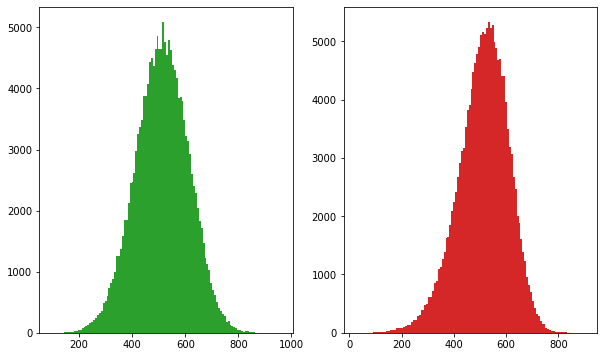

In [102]:
# math and reading plausible values

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.hist(df1.Plausible_value_in_mathematics, color=sb.color_palette()[2], bins=120);

plt.subplot(1,2,2)
plt.hist(df1.Plausible_value_in_reading, color=sb.color_palette()[3], bins=120);

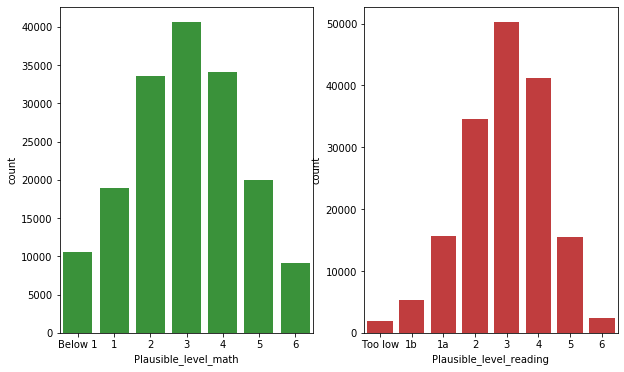

In [103]:
# math and reading 
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sb.countplot(df1.Plausible_level_math, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
sb.countplot(df1.Plausible_level_reading, color=sb.color_palette()[3]);

MATHEMATICS

With the dataset better cleaned from the start, the math values and levels appear to be normally distributed, with the mode at 3 for the levels, and a mean around 500 for the values


READING

The distribution of the reading level has a mode of 3 as well, and the mean of the reading values is around 500, as the one for math values, but these two distributions are slightly left-skewed.

### Other variables

CATEGORICAL variables

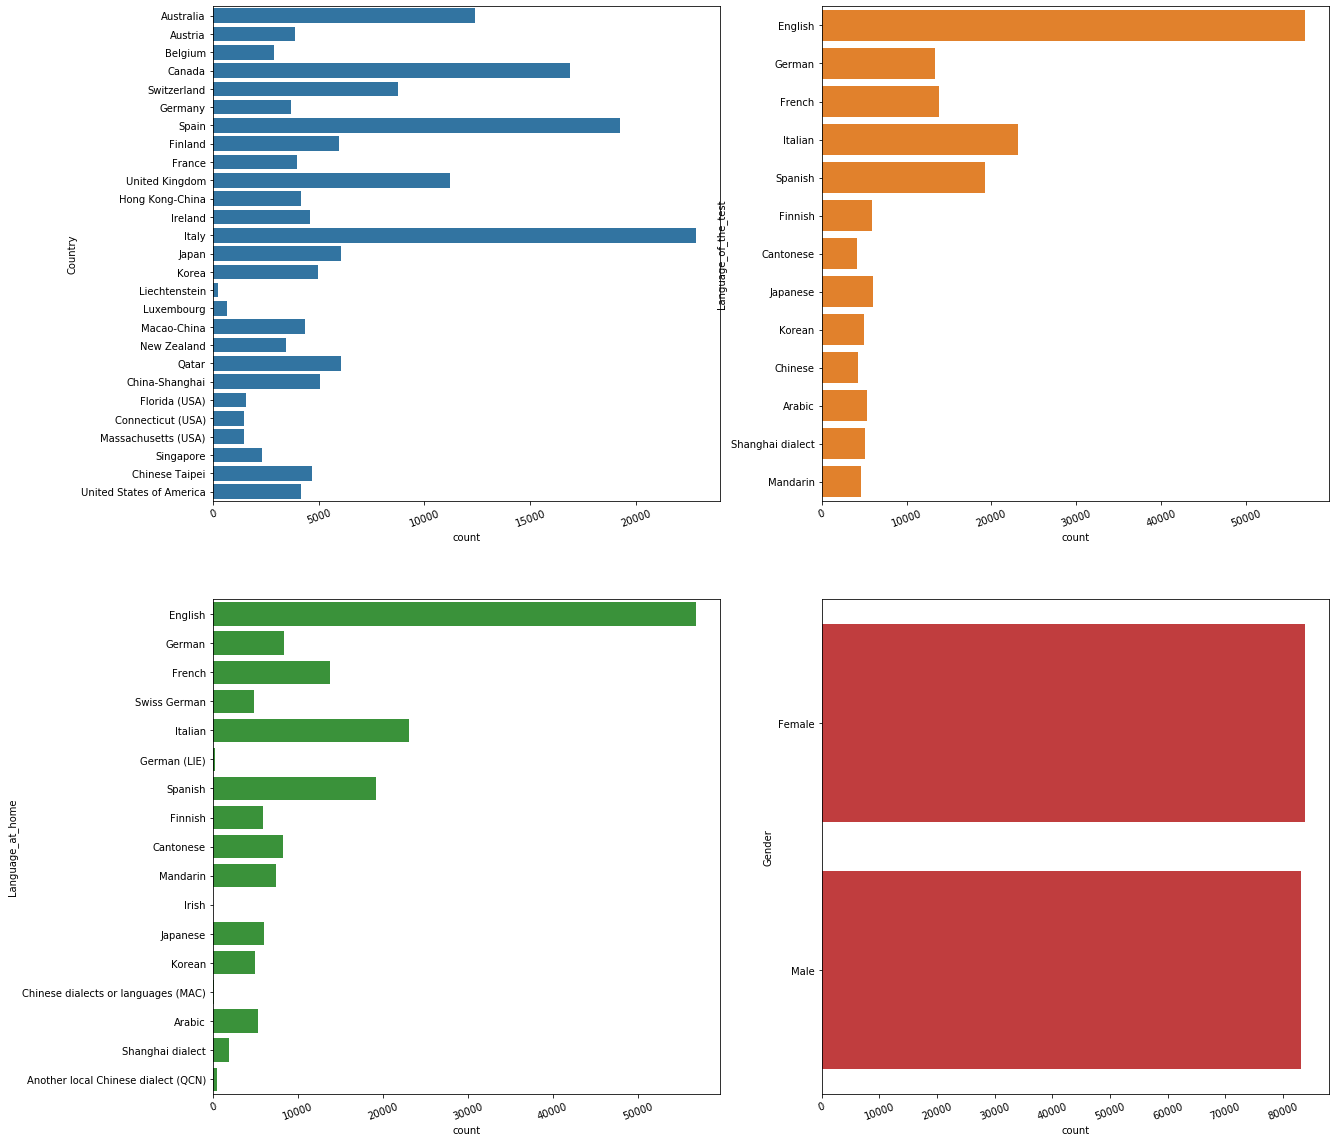

In [110]:
# CATEGORIES:
categories_to_plot = ['Country', 'Language_of_the_test', 'Language_at_home', 'Gender']

# create the grid
fig, axes = plt.subplots(2,2, figsize=(20,20))
axes = axes.flatten()

for i in range(4):
    plt.sca(axes[i])
    col = categories_to_plot[i] # column to plot
    sb.countplot(data=df1, y=col, color=sb.color_palette()[i])
    plt.xticks(rotation=20)
    

#### Country
- Country: the most represented is Italy (more than 20k students each), followed by Spain and Canada (above 15k each). Between 10k and 15k there are Australia and the UK. All other Countries are under 10k.

#### Language
- Language_of_the_test: English is the most represented, followed by Italian. I need again to **regroup them into my 3 language-type categories**, still the logographic group is the less numerous.

- Language_at_home: a reasonable number of languages survived the last cleaning.

#### Gender
- The students in the selected dataset are about 50% male and 50% female.


### Language_of_the_test
Let's re-regroup the languages into my main three categories, which are already summarized into these variables:

```
shallow_ortography =['Spanish', 'Finnish', 'Italian', 'German']
deep_ortography = ['English', 'French', 'Arabic', 'English_Arabic']
logographic = ['Chinese', 'Japanese', 'Korean', 'Shanghai dialect', 'Mandarin', 'Cantonese']
```

In [113]:
# create a column "Language_type" and populate it on the base of the language_of_the_test variable

df1.loc[df1.Language_of_the_test.isin(shallow_ortography), 'Language_type'] = 'shallow orthography'
df1.loc[df1.Language_of_the_test.isin(deep_ortography), 'Language_type'] = 'deep orthography'
df1.loc[df1.Language_of_the_test.isin(logographic), 'Language_type'] = 'logographic'

In [114]:
# check my new column
df1.Language_type.value_counts()

deep orthography       76009
shallow orthography    61703
logographic            29200
Name: Language_type, dtype: int64

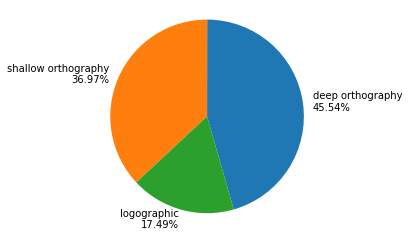

In [120]:
# plot it
labels = []
for a, b in zip(df1.Language_type.value_counts().index, df1.Language_type.value_counts().values/df1.Language_type.count()*100):
    labels.append(a + '\n' + '{:.2f}'.format(b) + '%')
plt.pie(df1.Language_type.value_counts(), labels=labels, startangle=-74, counterclock=True);
plt.axis('square');

Logographic languages still account for a much smaller proportion of the overall data than the other two language groups.

---

### NUMERIC variables


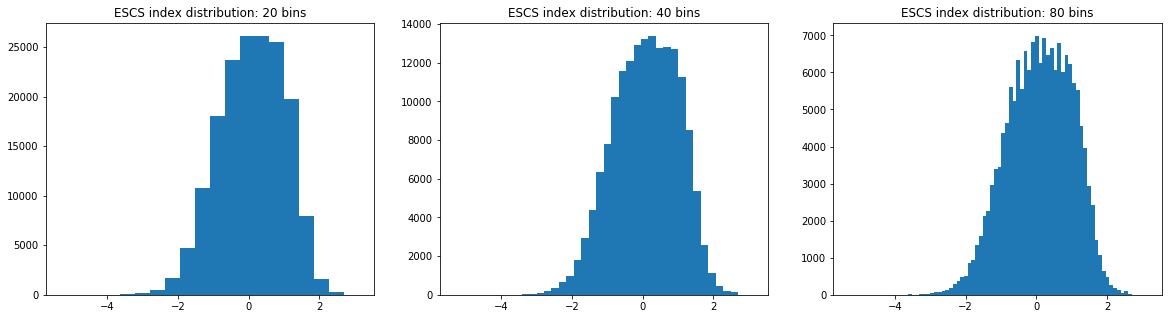

In [131]:
# Index_of_economic_social_cultural_status (ESCS): 

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs = axs.flatten()
bins = [20, 40, 80]

for i in range(len(bins)):
    plt.sca(axs[i])
    plt.hist(data=df1, x='Index_of_economic_social_and_cultural_status', bins=bins[i]);
    plt.title('ESCS index distribution: {} bins'.format(bins[i]))

In [132]:
ESCS0_below = (df1.Index_of_economic_social_and_cultural_status < 0).sum()
ESCS0_above = (df1.Index_of_economic_social_and_cultural_status >= 0).sum()
print('students below ESCS 0: {};\nstudents at or above ESCS 0: {}\ndifference: {}'.format(ESCS0_below, ESCS0_above, (ESCS0_below-ESCS0_above)))

ESCS_minus2_below = (df1.Index_of_economic_social_and_cultural_status < -2).sum()
ESCS_plus2_above = (df1.Index_of_economic_social_and_cultural_status > 2).sum()
print('\nstudents below ESCS -2: {};\nstudents at or above ESCS +2: {}\ndifference: {}'.format(ESCS_minus2_below, ESCS_plus2_above, (ESCS_minus2_below-ESCS_plus2_above)))

print('\nnumber of NaNs: ', df1.Index_of_economic_social_and_cultural_status.isna().sum())

students below ESCS 0: 74854;
students at or above ESCS 0: 92058
difference: -17204

students below ESCS -2: 2013;
students at or above ESCS +2: 1051
difference: 962

number of NaNs:  0


ESCS distribution is left skewed.
If we take 0 as a neutral point, were students are "OK" (not priviledged, but neither disadvantaged), then there are 17204 more student on the disadvantaged side than in the advantaged one. Before the last cleaning they were 20135
About the extremes,  for ESCS < -2 now there are 962 students more than for ESCS >+2. Before there were 17777 of them.

The distribution is slightly less skewed, two possible reasons:
- removal of all Countries that chose the simplified set of booklets (main reason probably)
- removal of all the students whose language at home was different of the language of the test, i.e. mainly immigrants

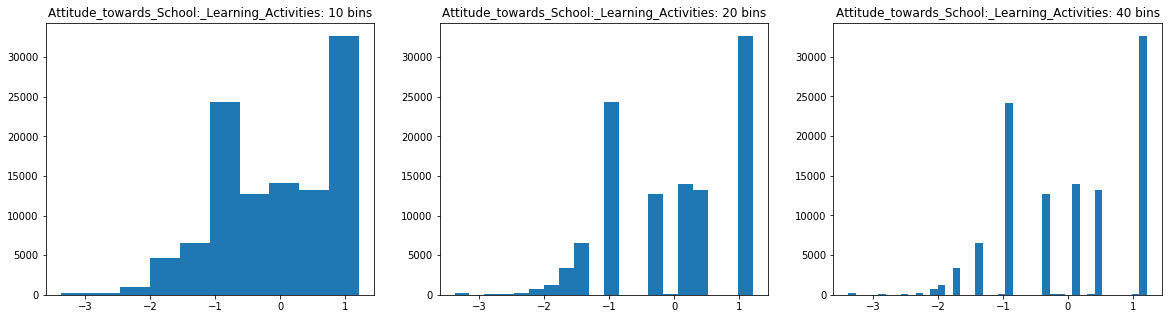

In [135]:
# Attitude_towards_School:_Learning_Activities
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs = axs.flatten()
bins = [10, 20, 40]

for i in range(len(bins)):
    plt.sca(axs[i])
    plt.hist(data=df1, x='Attitude_towards_School:_Learning_Activities', bins=bins[i]);
    plt.title('Attitude_towards_School:_Learning_Activities: {} bins'.format(bins[i]))

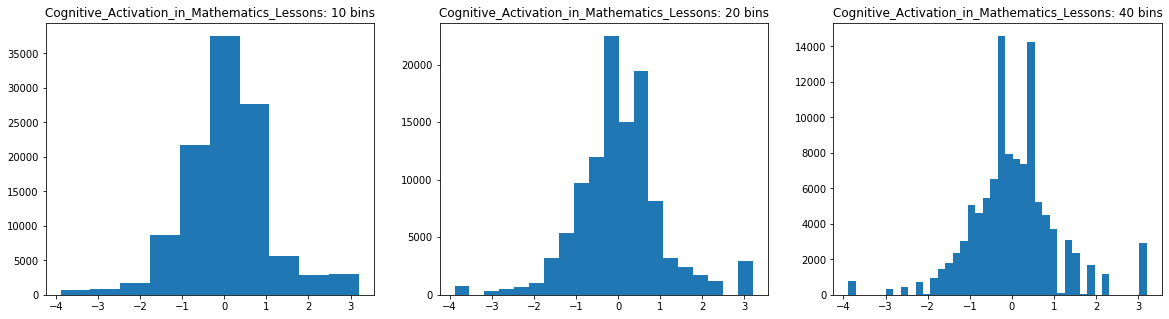

In [139]:
# Cognitive_Activation_in_Mathematics_Lessons
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs = axs.flatten()
bins = [10, 20, 40]

for i in range(len(bins)):
    plt.sca(axs[i])
    plt.hist(data=df1, x='Cognitive_Activation_in_Mathematics_Lessons', bins=bins[i]);
    plt.title('Cognitive_Activation_in_Mathematics_Lessons: {} bins'.format(bins[i]))

In [141]:
# unique values, NaNs and their row "Language of test" values
print(df1.Cognitive_Activation_in_Mathematics_Lessons.isna().sum())
print(df1.loc[df1.Cognitive_Activation_in_Mathematics_Lessons.isna()]['Language_of_the_test'].value_counts())

56767
English             19321
Italian              7770
Spanish              6468
French               4756
German               4589
Finnish              2045
Arabic               2031
Japanese             2010
Shanghai dialect     1673
Korean               1656
Mandarin             1610
Chinese              1432
Cantonese            1406
Name: Language_of_the_test, dtype: int64


In [142]:
# the language_of_the_test values:
df1.Language_of_the_test.value_counts()

English             56879
Italian             23103
Spanish             19242
French              13797
German              13404
Japanese             6059
Finnish              5954
Arabic               5333
Shanghai dialect     5054
Korean               4954
Mandarin             4695
Chinese              4281
Cantonese            4157
Name: Language_of_the_test, dtype: int64

The last two variables have a lot of NaNs, again many of them in the two bigger language-type groups, but a significative number also in the logographic group. Since I'm not using these two variables, they will remain like this.

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166912 entries, 17408 to 309871
Data columns (total 13 columns):
Country                                         166912 non-null object
Student_ID                                      166912 non-null object
Gender                                          166912 non-null object
Attitude_towards_School:_Learning_Activities    109586 non-null float64
Cognitive_Activation_in_Mathematics_Lessons     110145 non-null float64
Index_of_economic_social_and_cultural_status    166912 non-null float64
Language_at_home                                166912 non-null object
Language_of_the_test                            166912 non-null object
Plausible_value_in_mathematics                  166912 non-null float64
Plausible_value_in_reading                      166912 non-null float64
Plausible_level_math                            166912 non-null category
Plausible_level_reading                         166912 non-null category
Language_type           

In [144]:
# make a copy (reordered, without Cognitive activation and Attitude towards school)
exploration_df1 = df1[['Country', 'Student_ID', 'Gender', 'Index_of_economic_social_and_cultural_status', 'Language_at_home', 'Language_of_the_test', 'Language_type', 'Plausible_value_in_mathematics', 'Plausible_value_in_reading', 'Plausible_level_math', 'Plausible_level_reading']].copy()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- **Country** : the most represented is Italy (more than 20k students each), followed by Spain and Canada (above 15k each). Between 10k and 15k there are Australia and the UK. All other Countries are under 10k.;
- **Student_ID**
- **Gender** : about 50% females, 50% males
- **Index_of_economic_social_and_cultural_status** : ESCS distribution is left skewed (less than before, probably because of the absence of the Countries that choose the simplified booklets).
  If we take 0 as a neutral point, were students are "OK" (not priviledged, but neither disadvantaged), then there are 17204 more student on the disadvantaged side than in the advantaged one. Before the last cleaning they were 20135
  About the extremes,  for ESCS < -2 now there are 962 students more than for ESCS >+2. Before there were 17777 of them.
- **Language_at_home** : a reasonable number of languages survived the last cleaning (read: many less than before);
- **Language_of_the_test** : English is the most represented, followed by Italian. Then we have Spanish, French and German. All other account for less than 8k rows each;
- **Language_type** : my new variable: three categories "shallow_ortography" (Spanish, Finnish, Italian, German), "deep_ortography" (English, French, Arabic, English_Arabic), "logographic" (Chinese, Japanese, Korean, Shanghai dialect, Mandarin, Cantonese)
- **Plausible_value_in_mathematics** and **Plausible_level_in_math** : with the dataset better cleaned from the start, the math values and levels appear to be normally distributed, with the mode at 3 for the levels, and a mean around 500 for the values
- **Plausible_value_in_reading** and **Plausible_level_in_reading** : The distribution of the reading level has a mode of 3 as well, and the mean of the reading values is around 500, as the one for math values, but these two distributions are slightly left-skewed.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Data were difficult to interpret because of the presence of the countries that chose to use only the Simplified set of booklets. I had initially kept them, because they had been weighted so that the results of those Countries could be comparable with the rest of the data.
It is indeed possible to use the data alltogether and with the correct weight for each line) to judge the performance of the schooling system of each Country compared to the others.
However I am regrouping the data by a different criterion (the language type) and therefore including the Countries whose schooling system has evidentely a markedly different effect on the performance of their students (and, in fact, those Countries choose the simplified booklets) was simply adding complexity (and a variable that needed to be highlighted).

On the same line, I dropped directly the rows where the language at home was not the language of the test.

---

Along vith the Plausible_levels variables this time I kept the original Plausible_values given in the dataset PISA2012. It is true that the levels are easier to interpret, but the values are a numeric variable that can be useful for the visualizations.

---

This time I did not trim the data to try and have sample of the same size, because I faound that it can be useful to explore within Countries as well, to have an idea of the effect of the schooling system.

In [145]:
# Language_type by Language_of_the_test and Country
exploration_df1.groupby(['Language_type','Language_of_the_test'])['Country'].value_counts()

Language_type        Language_of_the_test  Country                 
deep orthography     Arabic                Qatar                        5333
                     English               Canada                      13382
                                           Australia                   12385
                                           United Kingdom              11197
                                           Ireland                      4571
                                           United States of America     4179
                                           New Zealand                  3474
                                           Singapore                    2312
                                           Florida (USA)                1577
                                           Connecticut (USA)            1467
                                           Massachusetts (USA)          1466
                                           Qatar                         722
        

In [146]:
exploration_df1.Language_type.value_counts()

deep orthography       76009
shallow orthography    61703
logographic            29200
Name: Language_type, dtype: int64

In [147]:
exploration_df1.groupby(['Language_type'])['Language_of_the_test'].value_counts()

Language_type        Language_of_the_test
deep orthography     English                 56879
                     French                  13797
                     Arabic                   5333
logographic          Japanese                 6059
                     Shanghai dialect         5054
                     Korean                   4954
                     Mandarin                 4695
                     Chinese                  4281
                     Cantonese                4157
shallow orthography  Italian                 23103
                     Spanish                 19242
                     German                  13404
                     Finnish                  5954
Name: Language_of_the_test, dtype: int64

Text(0.5, 1.0, 'ESCS index distribution: 40 bins')

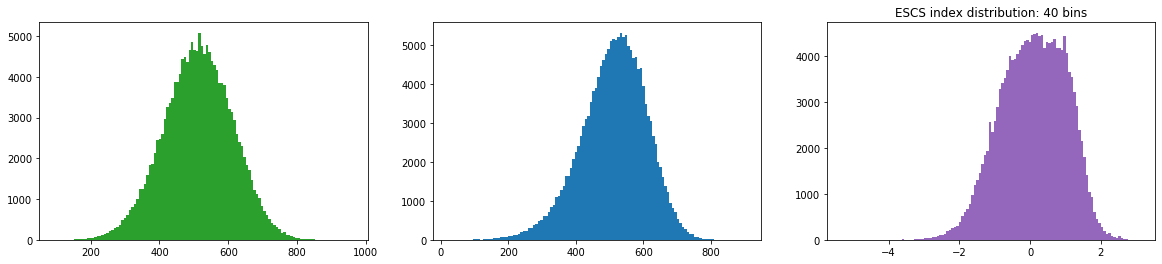

In [166]:
# a quick look at the univariate distribution of the variables, side to side, I want to focus on

plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.hist(data=exploration_df1, x='Plausible_value_in_mathematics', bins=120, color=sb.color_palette()[2]);

plt.subplot(1,3,2)
plt.hist(data=exploration_df1, x='Plausible_value_in_reading', bins=120, color=sb.color_palette()[0]);

plt.subplot(1,3,3)
plt.hist(data=exploration_df1, x='Index_of_economic_social_and_cultural_status', bins=120, color=sb.color_palette()[4]);
plt.title('ESCS index distribution: {} bins'.format('40'))



In [167]:
exploration_df1[['Plausible_value_in_mathematics', 'Plausible_value_in_reading', 'Index_of_economic_social_and_cultural_status']].describe()

,Plausible_value_in_mathematics,Plausible_value_in_reading,Index_of_economic_social_and_cultural_status
count,166912.000000,166912.000000,166912.000000
mean,512.334852,512.147424,0.092819
std,99.624082,96.222315,0.918376
min,93.636100,22.356000,-5.320000
25%,445.793700,452.363600,-0.560000
50%,513.639200,518.840200,0.130000
75%,581.251000,579.453200,0.800000
max,962.229300,904.802600,3.120000


Plausible values in reading and ESCS index distributions are different in the shape, with the latter presenting std (in scale), but they somehow look very similar in their left-skewedness (if you can say so)

## Bivariate exploration - another round
After better cleaning the data, we can move on! :)

In [168]:
exploration_df1.columns

Index(['Country', 'Student_ID', 'Gender',
       'Index_of_economic_social_and_cultural_status', 'Language_at_home',
       'Language_of_the_test', 'Language_type',
       'Plausible_value_in_mathematics', 'Plausible_value_in_reading',
       'Plausible_level_math', 'Plausible_level_reading'],
      dtype='object')

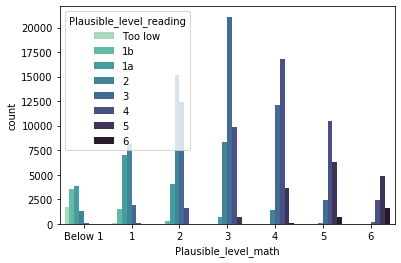

In [170]:
# lets look fist to a possible correlation among the math scale and subscales and the reading scale

sb.countplot(data=exploration_df1, x='Plausible_level_math', hue='Plausible_level_reading', palette='mako_r');
    

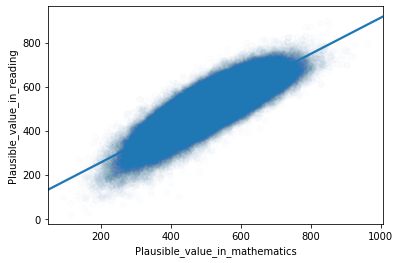

In [177]:
sb.regplot(data=exploration_df1, x='Plausible_value_in_mathematics',
           y='Plausible_value_in_reading', scatter_kws={'alpha':.01});

There is a clear positive correlation between test result in reading and test results in mathematics.

The scatterplot could be improved sampling the data.

In [197]:
# cut the ESCS index into bands and create a new category column
min_ESCS = exploration_df1.Index_of_economic_social_and_cultural_status.min()
max_ESCS =  exploration_df1.Index_of_economic_social_and_cultural_status.max()
band_limits = np.linspace(min_ESCS, max_ESCS, num=10, endpoint=True)

# create the category
ESCS_bands = ['-5.32 to -4.38', '-4.38 to -3.44', '-3.44 to -2.51',
              '-2.51 to -1.57', '-1.57 to -0.63', '-0.63 to 0.31',
              '0.31 to 1.24', '1.24 to 2.18', '2.18 to 3.12']
ESCS_bands_order = pd.api.types.CategoricalDtype(ordered=True, categories=ESCS_bands)

def numerical_to_category(x, band_limits=[0,1,2,3,4,5]):
    for i in range(len(band_limits)-1):
        if band_limits[i] <= x < band_limits[i+1]:
            return '{:.2f} to {:.2f}'.format(band_limits[i], band_limits[i+1])
        elif x == band_limits[-1]:
            return '{:.2f} to {:.2f}'.format(band_limits[-2], band_limits[-1])

# apply to the ESCS index column and create a new column
exploration_df1['ESCS_levels'] = exploration_df1.Index_of_economic_social_and_cultural_status.apply(numerical_to_category, band_limits=band_limits)
# turn into ordered category
exploration_df1.ESCS_levels = exploration_df1.ESCS_levels.astype(ESCS_bands_order)


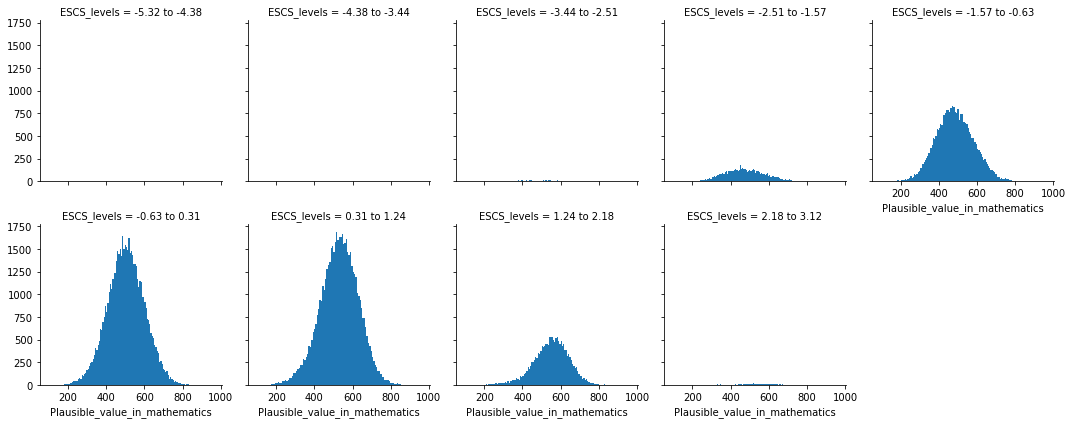

In [208]:
# math values by ESCS

g = sb.FacetGrid(data=exploration_df1, col='ESCS_levels', col_wrap=5, xlim=None, ylim=(0, 250))
g.map(plt.hist, 'Plausible_value_in_mathematics', bins=120);

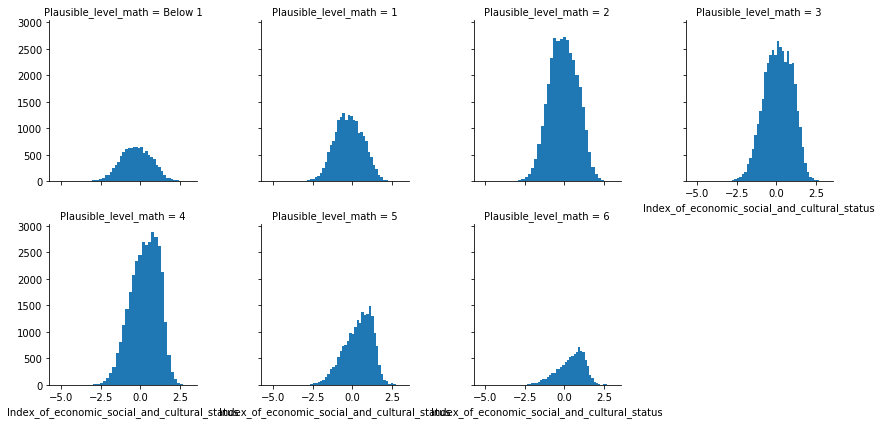

In [179]:
# ESCS index by math level 
g = sb.FacetGrid(data=exploration_df1, col='Plausible_level_math', col_wrap=4)
g.map(plt.hist, 'Index_of_economic_social_and_cultural_status', bins=40);

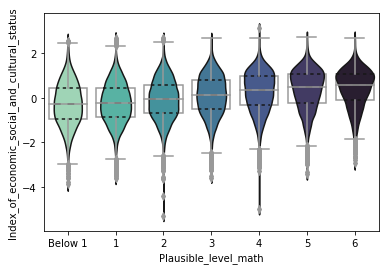

In [201]:
# math level by ESCS again
sb.violinplot(data=exploration_df1, x='Plausible_level_math', y='Index_of_economic_social_and_cultural_status', palette='mako_r', inner='quartile');
sb.boxplot(data=exploration_df1, x='Plausible_level_math', y='Index_of_economic_social_and_cultural_status', color='white');

For the central ESCS levels the distribution of math is normal with different mean and std, the two lowest levels are almost empty now, the level '1.24 to 2.18' start to be slightly left-skewed, the top levels is much more left-skewed. It also appears bimodal, but there are not many data.

If, instead, we plot the ESCS index by the math levels, we see the curve starting slightly right-skewed for math level 'below 1', going normal and then bending on the other side, with an ESCS index mean that increases, as we move up the math levels. When we reach level 6 it is definitely left-skewed.

There looks to be a correlation here, and it is a bit sad: very bad levels in mathematics can be "achieved" by students from every socioeconomic and cultural background. On the other side, students living in the most disadvantaged condition are not presents in the top mathematics scores.

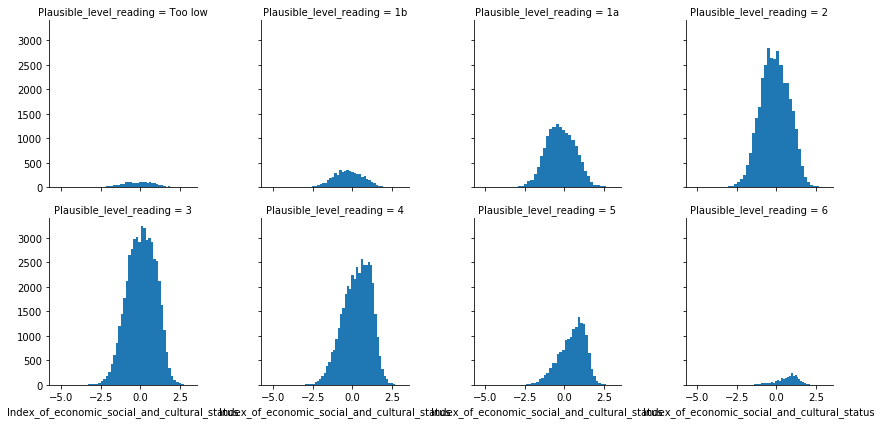

In [205]:
# ESCS index by reading levels
g = sb.FacetGrid(data=exploration_df1, col='Plausible_level_reading', col_wrap=4)
g.map(plt.hist, 'Index_of_economic_social_and_cultural_status', bins=40);

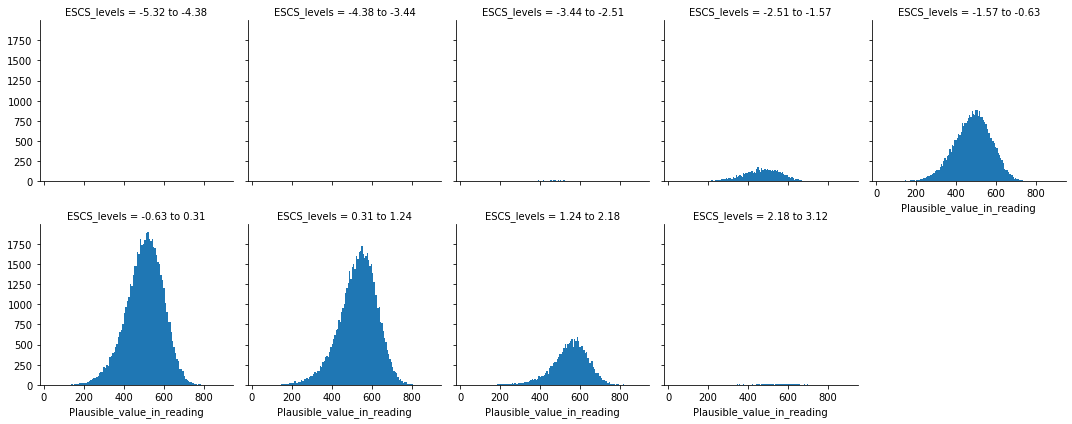

In [210]:
# reading values by ESCS

g = sb.FacetGrid(data=exploration_df1, col='ESCS_levels', col_wrap=5)
g.map(plt.hist, 'Plausible_value_in_reading', bins=120);

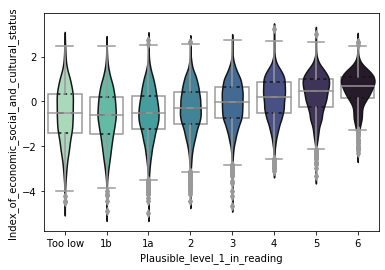

In [510]:
# reading level by ESCS
sb.violinplot(data=exploration_df, x='Plausible_level_1_in_reading', y='Index_of_economic_social_and_cultural_status', palette='mako_r', inner='quartile');
sb.boxplot(data=exploration_df, x='Plausible_level_1_in_reading', y='Index_of_economic_social_and_cultural_status', color='white');

The relationship between reading and ESCS is similar to math and ESCS, maybe a little less clean in the lowest reading levels and more defined in the upper ones.

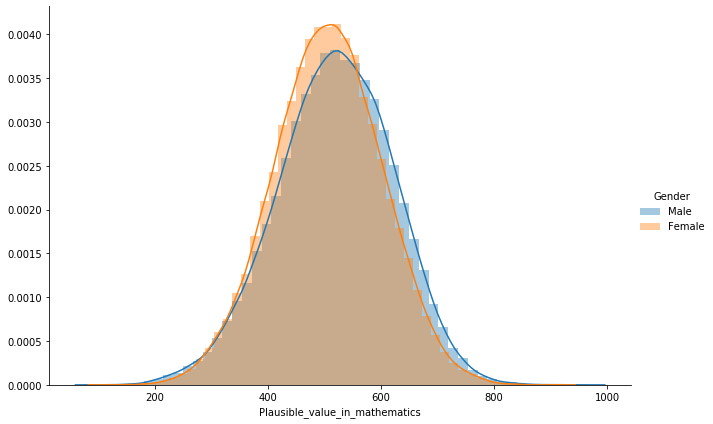

In [287]:
# Math value by gender (normalized) 
g = sb.FacetGrid(data=exploration_df1, hue='Gender', hue_order=['Male', 'Female'], height=6, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_mathematics',  norm_hist=True);
g.add_legend();

In [288]:
exploration_df1.groupby('Gender').Plausible_value_in_mathematics.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,83782.0,505.895564,95.682469,113.8885,441.2759,506.3951,571.0469,912.2994
Male,83130.0,518.824645,103.038972,93.6361,450.6232,521.3507,590.9098,962.2293


Girls seem to score a bit worst, generally: their mean is slightly lower, and their std is narrower.

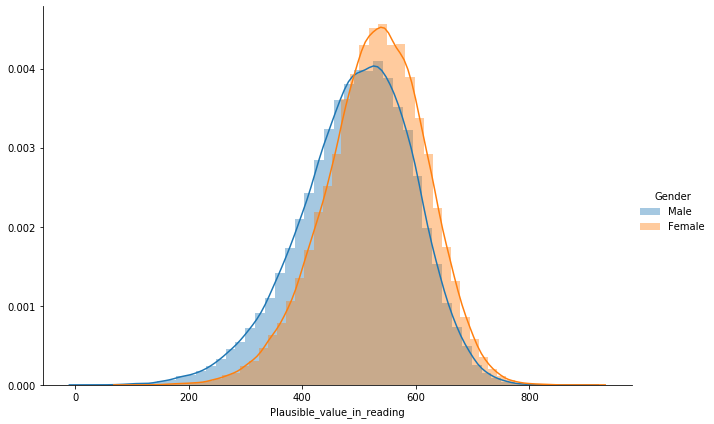

In [243]:
g = sb.FacetGrid(data=exploration_df1, hue='Gender', hue_order=['Male', 'Female'], height=6, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_reading',  norm_hist=True);
g.add_legend();

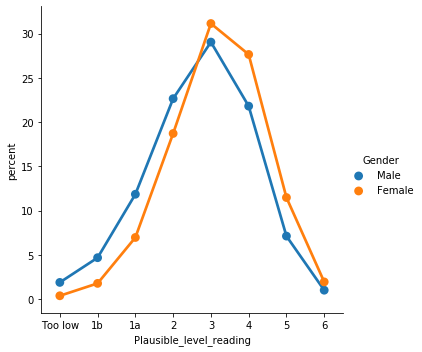

In [215]:
# Reading level by gender (normalized) 
read_gender_norm = exploration_df1.groupby('Gender')['Plausible_level_reading'].value_counts(normalize=True)
read_gender_norm = read_gender_norm.mul(100)
read_gender_norm = read_gender_norm.rename('percent').reset_index()

# turn Plausible_level into an ordered category again
read_gender_norm.Plausible_level_reading = read_gender_norm.Plausible_level_reading.astype(ordered_reading)

g = sb.catplot(data=read_gender_norm, x='Plausible_level_reading',y='percent',hue='Gender',
               hue_order=['Male', 'Female'], kind='point')


Contrary to math levels by gender, READING levels by gender suggests that girls are better than boys in this task.

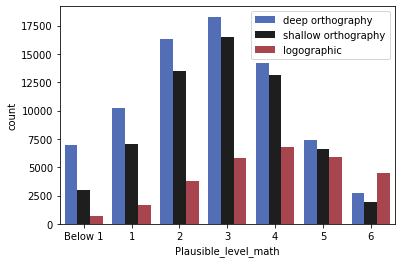

In [254]:
# the one I am really interested in: Math level by language type
sb.countplot(data=exploration_df1, x='Plausible_level_math', hue='Language_type', palette='icefire');
plt.legend(loc=1)
#I know it is a diverging palette, but with 3 categories it just is clearer and more pleasant than all the qualitative ones

There appear to be a difference in the performance among the 3 linguistic groups, but before trying to describe, let's normalize the counts.


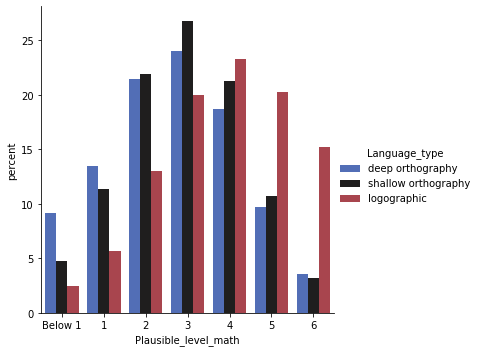

In [255]:
# distribution of math scores by language type (normalized)
math_language_norm = exploration_df1.groupby('Language_type')['Plausible_level_math'].value_counts(normalize=True)
math_language_norm = math_language_norm.mul(100)
math_language_norm = math_language_norm.rename('percent').reset_index()

# turn Plausible_level into an ordered category again
math_language_norm.Plausible_level_math = math_language_norm.Plausible_level_math.astype(ordered_math)

g = sb.catplot(data=math_language_norm, x='Plausible_level_math',y='percent',hue='Language_type',
               hue_order=['deep orthography', 'shallow orthography', 'logographic'], kind='bar', palette='icefire')


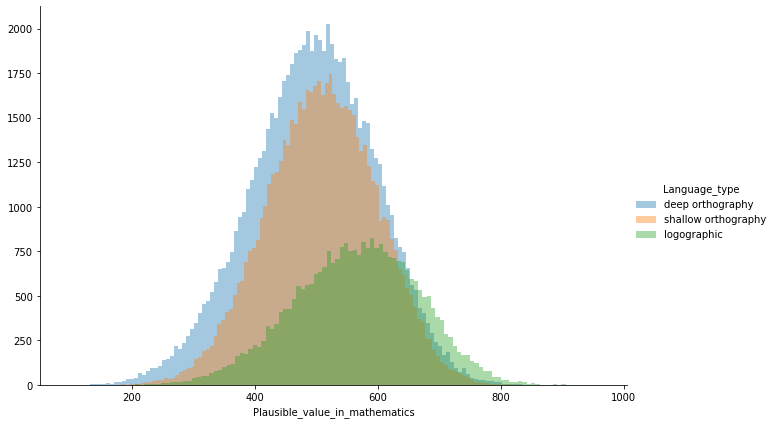

In [264]:
#using the math values
g = sb.FacetGrid(data=exploration_df1, hue='Language_type', height=6, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_mathematics',  kde=False, bins=120);
g.add_legend();

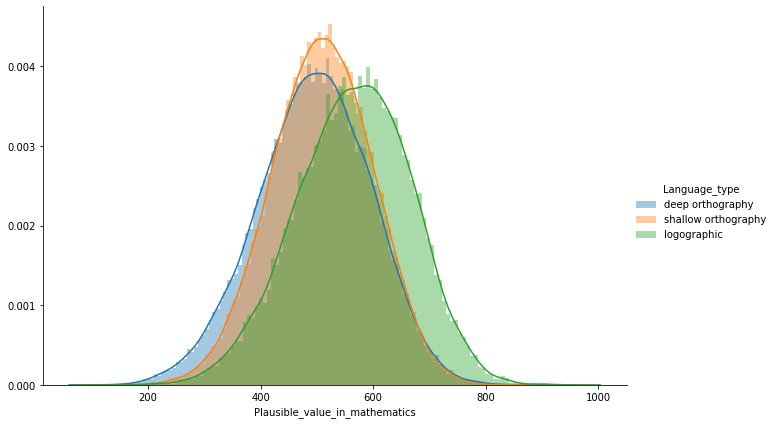

In [274]:
#using the math values (normalized)
g = sb.FacetGrid(data=exploration_df1, hue='Language_type', height=6, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_mathematics',  norm_hist=True, bins=120);
g.add_legend();

In [269]:
exploration_df1.groupby('Language_type').Plausible_value_in_mathematics.describe()

,count,mean,std,min,25%,50%,75%,max
Language_type,,,,,,,,
deep orthography,76009.0,495.055545,100.269931,93.6361,428.3455,497.3594,564.97120,872.6515
logographic,29200.0,564.770918,101.117630,113.8885,496.5026,568.4764,636.71130,962.2293
shallow orthography,61703.0,508.805846,89.122975,108.5138,448.2084,509.7445,570.61845,856.9170


After normalization (now the percentages within groups are shown) the plot changed very little.

The students using a logographic language perform better.
Using performance levels it seems that their distribution is left skewed.
Using the values, wich are more fine-grained, the distributions og each language group results normal:
The logographic group has an higher mean and a larger std (top of the curve is kind of flattened).
The deep orthography language group distribution has a similar shape, but with a lower mean (the lowest of the three).
The shallow orthography group is in the middle, with a mean a little above the one of the deep orthography languages, and the smallest std.

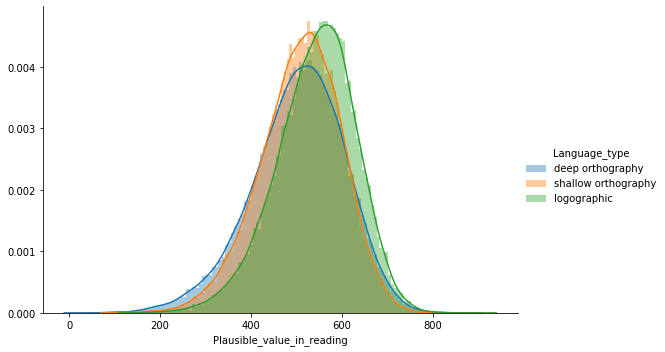

In [276]:
# reading values vs language type (normalized)
g = sb.FacetGrid(data=exploration_df1, hue='Language_type', height=5, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_reading',  norm_hist=True, bins=120);
g.add_legend();

It looks like these curves are all slightly left-skewed.
logographic group scores better in reading as well, deep orthography group tends to have more scores under a 400 values (level 2), but past that level the distribution matches the shallow one. 

There is one area, Macao-China, for which the PISA2012 dataset records a lot of test administered in Cinese, and a smaller number in English.

In [277]:
print(exploration_df1[exploration_df1.Country=='Macao-China'].Language_of_the_test.value_counts())


Chinese    4281
English      51
Name: Language_of_the_test, dtype: int64


In [278]:
within_macao = exploration_df1[exploration_df1.Country=='Macao-China'].copy()

In [280]:
within_macao.Language_at_home.value_counts()

Cantonese                              4083
Chinese dialects or languages (MAC)     127
Mandarin                                 71
English                                  51
Name: Language_at_home, dtype: int64

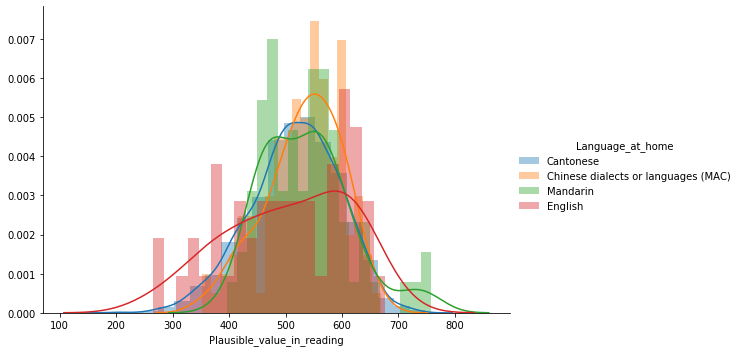

In [286]:
# reading values score by language at home
g = sb.FacetGrid(data=within_macao, hue='Language_at_home', height=5, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_reading',  norm_hist=True, bins=20);
g.add_legend();

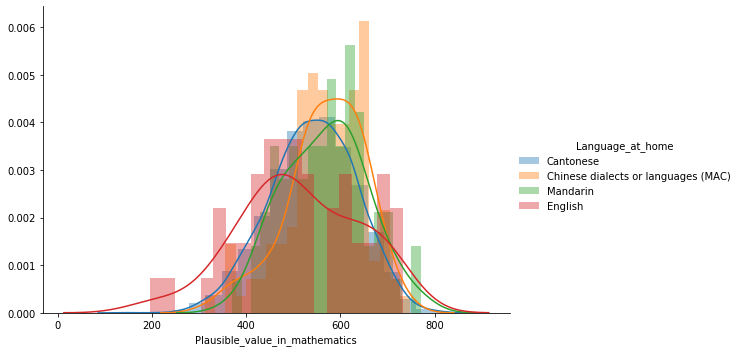

In [285]:
# math values by language at home
g = sb.FacetGrid(data=within_macao, hue='Language_at_home', height=5, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_mathematics',  norm_hist=True, bins=20);
g.add_legend();

Data for Macao-China has not changed. The number of test in English is not large (51), however Mandarin speaking students here are not much more (70) and the distribution of their scores follows the larger sample Cantonese distribution (4056 students).

If anything, we can think that, since the distribution of math scores for the English student is different from the one of the larger dataset, in the way that it looks bimodal as the reading values one, language is not a barrier per se.

NOTE: unfortunately the school system in Macao-China "[does not have a single centralised set of standards or curriculum. Individual schools follow different educational models, including Chinese, Portuguese, Hong Kong, and British systems.](https://en.wikipedia.org/wiki/Macau#Education)", nonetheless "[the majority of the schools in Macau are grammar schools, which offer language learning, mathematics, science subjects, social studies, etc. to the pupils](https://en.wikipedia.org/wiki/Education_in_Macau)", therefore it is reasonable to think that these data don't come from vocational school students (vocational schools anyhow starts there after 15).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- **Math levels vs reading levels**: There is a clear positive correlation between test result in reading and test results in mathematics.

- **Math levels by ESCS**: For the central ESCS levels the distribution of math is normal with different mean and std, the two lowest levels are almost empty now, the level '1.24 to 2.18' start to be slightly left-skewed, the top levels is much more left-skewed. It also appears bimodal, but there are not many data.

  If, instead, we plot the ESCS index by the math levels, we see the curve starting slightly right-skewed for math level 'below 1', going normal and then bending on the other side, with an ESCS index mean that increases, as we move up the math levels. When we reach level 6 it is definitely left-skewed.

  There looks to be a correlation here, and it is a bit sad: very bad levels in mathematics can be "achieved" by students from every socioeconomic and cultural background. On the other side, students living in the most disadvantaged condition are not presents in the top mathematics scores.
  
  
- **Math levels by gender (normalized)**: Girls seem to score a bit worst, generally: their mean is slightly lower, and their std is narrower.



Data for Macao-China has not changed. The number of test in English is not large (51), however Mandarin speaking students here are not much more (70) and the distribution of their scores follows the larger sample Cantonese distribution (4056 students).

If anything, we can think that, since the distribution of math scores for the English student is different from the one of the larger dataset, in the way that it looks bimodal as the reading values one, language is not a barrier per se.




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Contrary to math levels by gender, **READING levels by gender** suggests that girls are better than boys in this task.

- **reading and ESCS**: The relationship between reading and ESCS is similar to math and ESCS, maybe a little less clean in the lowest reading levels and more defined in the upper ones.



## Multivariate Exploration


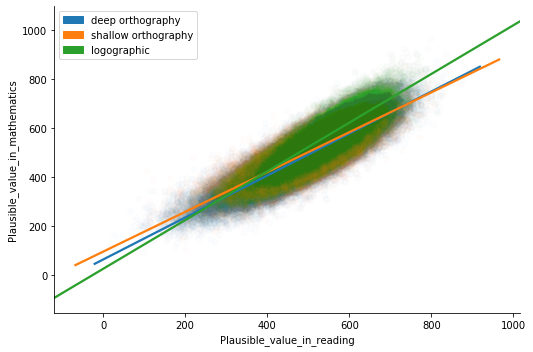

In [312]:
# relationship between reading and math values by language type
g = sb.FacetGrid(data=exploration_df1, hue='Language_type', height=5, aspect=1.5)
g.map(sb.regplot, 'Plausible_value_in_reading', 'Plausible_value_in_mathematics', scatter_kws={'alpha':0.01})

# .add_legend() does not work right

import matplotlib

name_to_color = {
    'deep orthography':   sb.color_palette()[0],
    'shallow orthography':   sb.color_palette()[1],
    'logographic': sb.color_palette()[2],
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches);

(all language type in the same graph, because it is easier to compare the angle of the regression line)

It looks like for the logographic languages the correlation between reading performance and math performance is stronger: for the same performance in reading at the PISA test, students in the logographic group perform better in math than students of the other groups.

Of course, this could very vell depend on other causes, like a schooling system that works harder on mathematics.

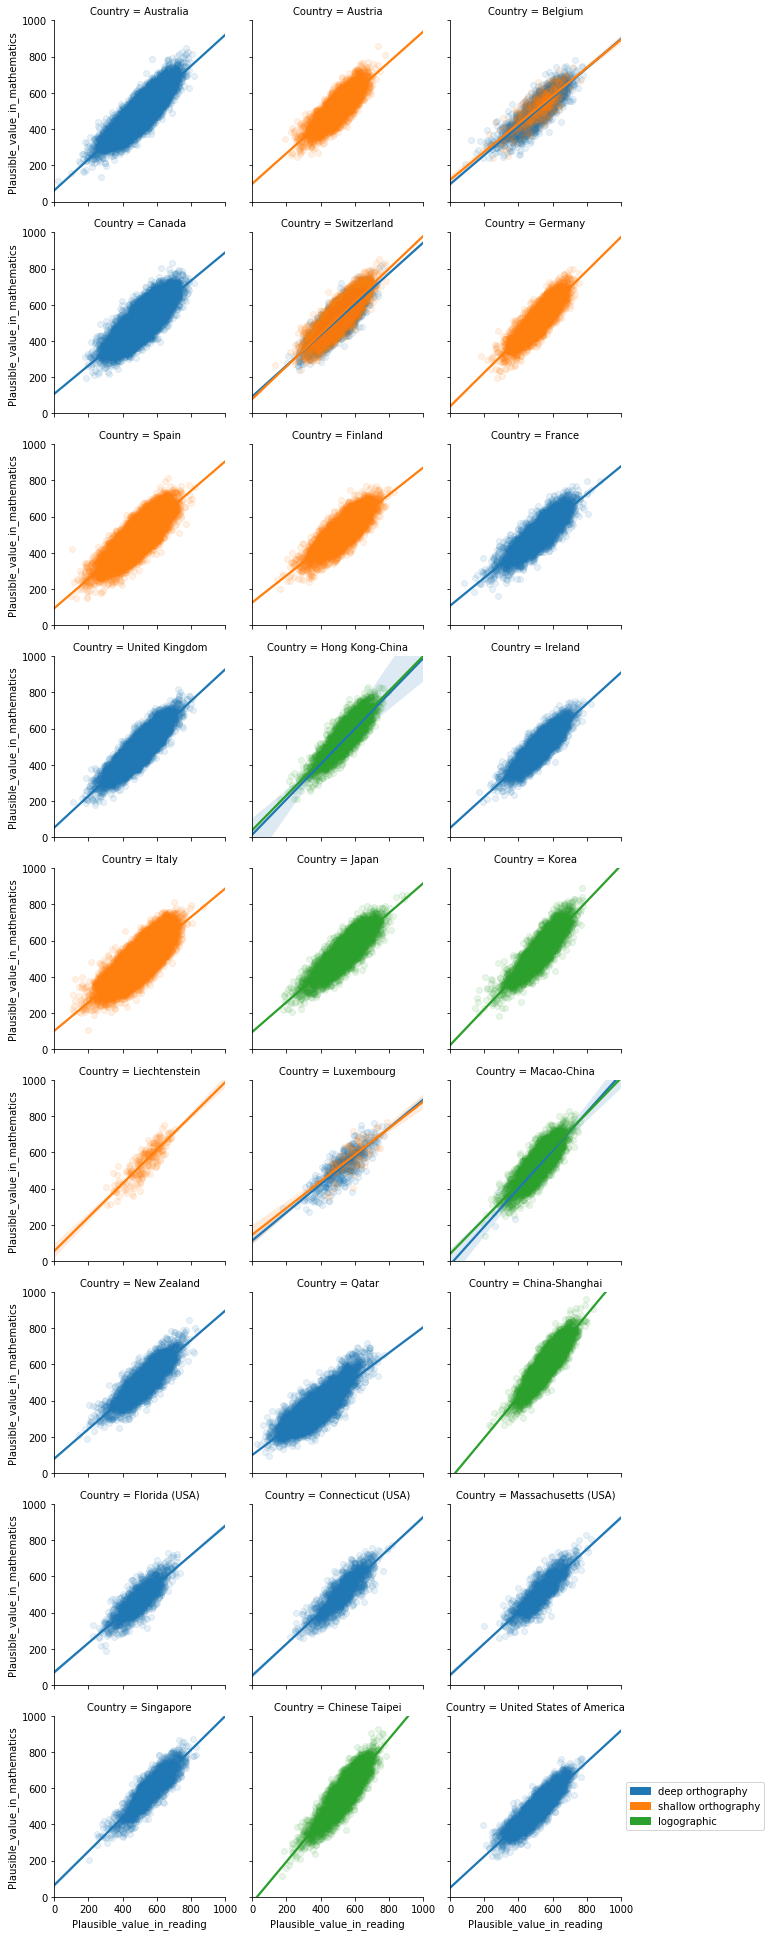

In [317]:
# relationship between reading and math values by language type, by country
g = sb.FacetGrid(data=exploration_df1, hue='Language_type', col='Country',
                 col_wrap=3, xlim=(0,1000), ylim=(0,1000), legend_out=True)
g.map(sb.regplot, 'Plausible_value_in_reading', 'Plausible_value_in_mathematics', scatter_kws={'alpha':0.1});

name_to_color = {
    'deep orthography':   sb.color_palette()[0],
    'shallow orthography':   sb.color_palette()[1],
    'logographic': sb.color_palette()[2],
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, loc=6, bbox_to_anchor=(1,0.5));

#### There are a few interesting Countries with two languages type each
- Belgium, Switzerland, Luxembourg : deep and shallow orthography
- Hong Kong-China, Macao-China : deep orthography and logographic

In [328]:
# focus on those countries
exploration_df1_subset = exploration_df1[exploration_df1.Country.isin(['Belgium', 'Switzerland', 'Luxembourg', 'Hong Kong-China', 'Macao-China'])]

Country          Language_of_the_test
Belgium          French                  2399
                 German                   494
Hong Kong-China  Cantonese               4157
                 English                   13
Luxembourg       French                   455
                 German                   118
                 English                   83
Macao-China      Chinese                 4281
                 English                   51
Switzerland      German                  4983
                 French                  3444
                 Italian                  304
Name: Language_of_the_test, dtype: int64

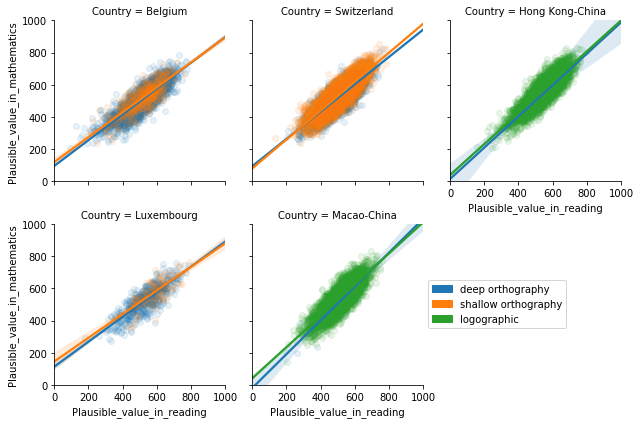

In [327]:
# plot them
g = sb.FacetGrid(data=exploration_df1_subset, hue='Language_type', col='Country',
                 col_wrap=3, xlim=(0,1000), ylim=(0,1000), legend_out=True)
g.map(sb.regplot, 'Plausible_value_in_reading', 'Plausible_value_in_mathematics', scatter_kws={'alpha':0.1});

name_to_color = {
    'deep orthography':   sb.color_palette()[0],
    'shallow orthography':   sb.color_palette()[1],
    'logographic': sb.color_palette()[2],
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, loc=6, bbox_to_anchor=(1,0.5));

In [421]:
# number of rows each
exploration_df1_subset.groupby('Country').Language_of_the_test.value_counts()

Country          Language_of_the_test
Belgium          French                  2399
                 German                   494
Hong Kong-China  Cantonese               4157
                 English                   13
Luxembourg       French                   455
                 German                   118
                 English                   83
Macao-China      Chinese                 4281
                 English                   51
Switzerland      German                  4983
                 French                  3444
                 Italian                  304
Name: Language_of_the_test, dtype: int64

I have already seen that Macao has very few English (blue) datapoints. Hong Kong has even less of them (13), so I would not dare to make comments on the trendline.

In Belgium and Luxembourg there is a conversion of the regression line. {Luxembourg](https://omniglot.com/writing/luxembourgish.htm) schooling system is multilingual and students from different language backgrounds study together. [Belgium schooling system](https://fr.wikipedia.org/wiki/Enseignement_secondaire_en_Belgique) is different, as it is divided by linguistic groups, but has a [common bases of basic competence levels that has to be reached by every student at the end of every cycle](https://fr.wikipedia.org/wiki/Syst%C3%A8me_%C3%A9ducatif_en_Belgique#Programmes_et_examens_dans_le_primaire_et_le_secondaire).
The [Swiss system](https://en.wikipedia.org/wiki/Education_in_Switzerland) is differently organized, in the way that the Federation only defines the compulsory years of education, while each Cantons has then the faculty of organizing the system. The shallow language group here, contains both German and Italian. German Cantons and the Italian Ticino may be interesting to compare (even if Italian datapoints are much less: 304 vs 4983).

In [358]:
# sample the german and french data for switzerland
np.random.seed(55)
switzerland_df = exploration_df1.query('Country=="Switzerland"')

fractions_to_drop = {'French':.9, 'German':.95}
for lang, frac in fractions_to_drop.items():
    switzerland_df = switzerland_df.drop(switzerland_df.loc[switzerland_df.Language_of_the_test == lang].sample(frac=frac).index)
    
switzerland_df.Language_of_the_test.value_counts()

French     344
Italian    304
German     249
Name: Language_of_the_test, dtype: int64

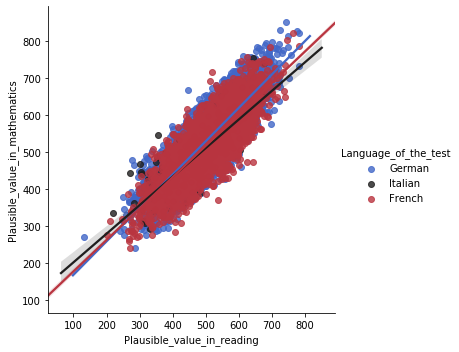

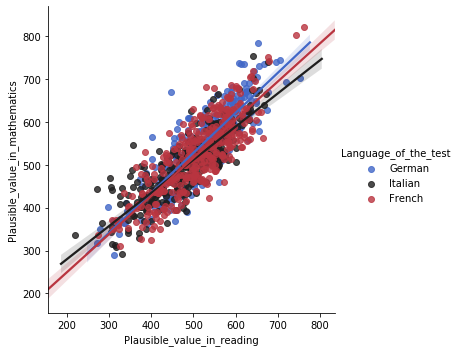

In [362]:
# plot the full data and the sampled ones, to be sure the trendlines stay the same

g1 = sb.FacetGrid(data=exploration_df1_subset.query('Country=="Switzerland"'), hue='Language_of_the_test',
                 palette='icefire', height=5, aspect=1)
g1.map(sb.regplot, 'Plausible_value_in_reading', 'Plausible_value_in_mathematics')
g1.add_legend()


g2 = sb.FacetGrid(data=switzerland_df, hue='Language_of_the_test', palette='icefire', height=5, aspect=1)
g2.map(sb.regplot, 'Plausible_value_in_reading', 'Plausible_value_in_mathematics')
g2.add_legend()

This graph seems to suggest that the schooling system is more important than the language type. Here we have, in the order, a shallow language group member (Italian) that for high values of reading performance, scores worse in mathemathic than a deep language (French), which, however, scores worse than another shallow language (German).

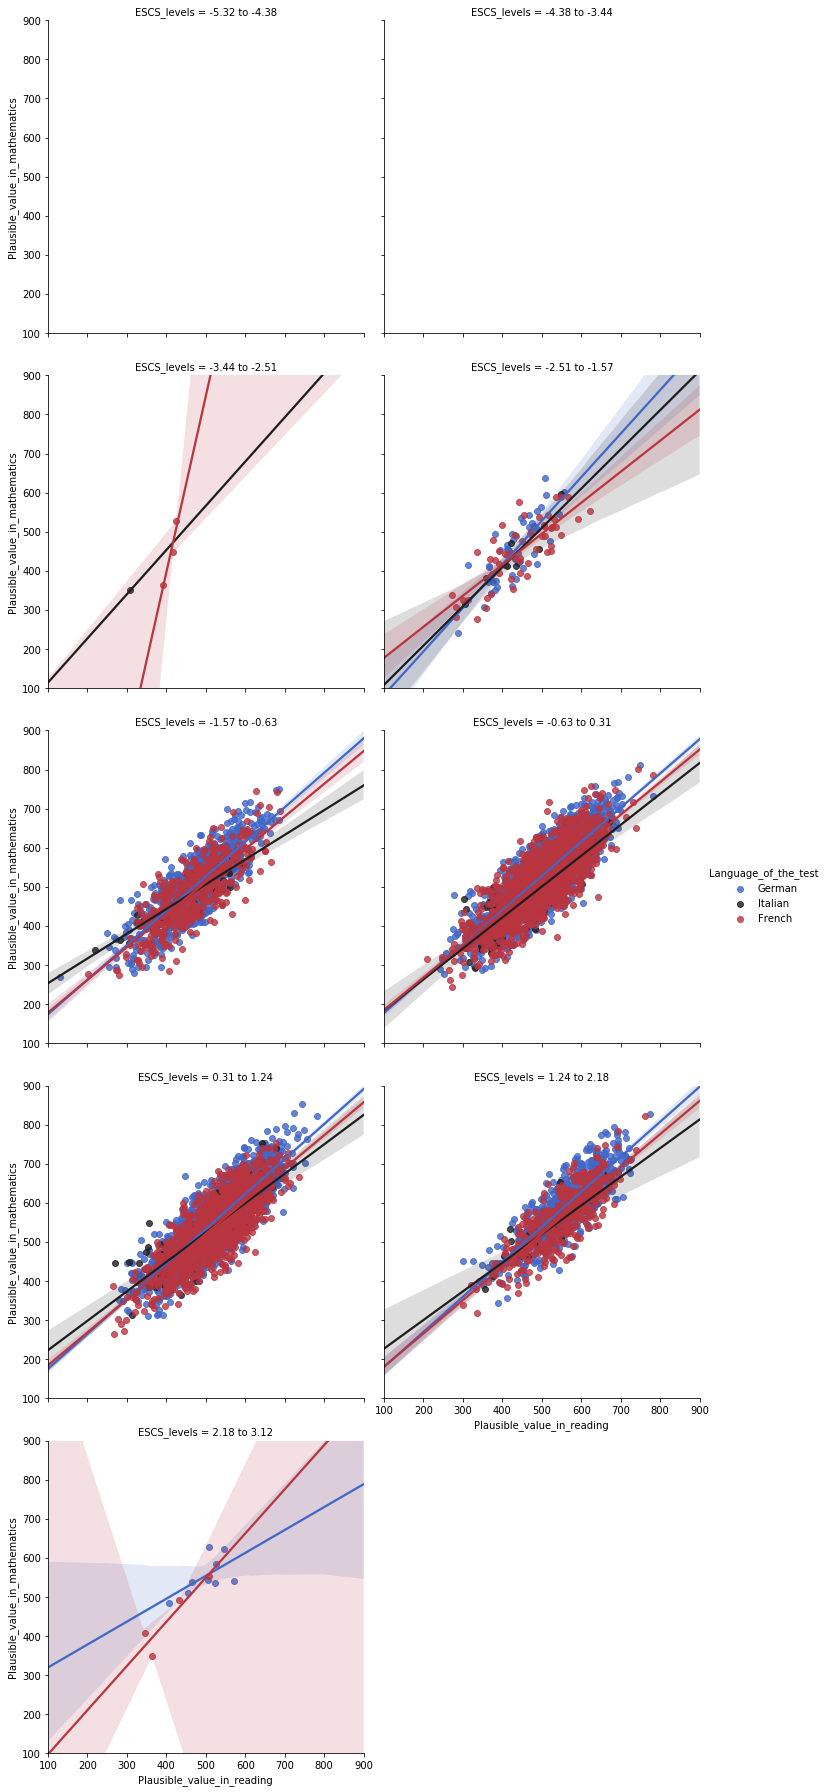

In [366]:
g2 = sb.FacetGrid(data=exploration_df1_subset.query('Country=="Switzerland"'), hue='Language_of_the_test', col='ESCS_levels',
                  col_wrap=2, palette='icefire', height=5, aspect=1, xlim=(100,900), ylim=(100,900))
g2.map(sb.regplot, 'Plausible_value_in_reading', 'Plausible_value_in_mathematics')
g2.add_legend();

To have a better look at the role of the educational system, since it seems most relevant, we can observe the distributions of the English speaking Countries.

In [385]:
english_df = exploration_df1.query('Language_of_the_test=="English"')

In [386]:
english_df.groupby('Country').Plausible_value_in_mathematics.describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,12385.0,497.755682,94.624259,115.4463,431.383400,496.42470,563.802800,848.9718
Canada,13382.0,509.237250,84.034731,195.4432,451.324200,508.10870,567.697500,789.2273
Connecticut (USA),1467.0,510.091446,95.900723,259.5498,439.718000,510.52340,579.381550,773.7264
Florida (USA),1577.0,469.068658,84.338675,187.1086,410.118400,466.82510,526.725300,727.3797
Hong Kong-China,13.0,472.511292,107.507339,329.0310,407.625800,446.72850,579.848900,652.9911
Ireland,4571.0,502.567121,84.053601,196.1443,446.650600,503.66880,560.258650,754.1751
Luxembourg,83.0,589.320954,69.063842,399.8364,549.431400,589.89720,637.490250,760.5624
Macao-China,51.0,511.609378,126.540083,195.7548,430.916050,496.65840,616.225300,731.7417
Massachusetts (USA),1466.0,517.407266,92.017642,256.5898,451.109975,514.14550,581.445750,829.1868


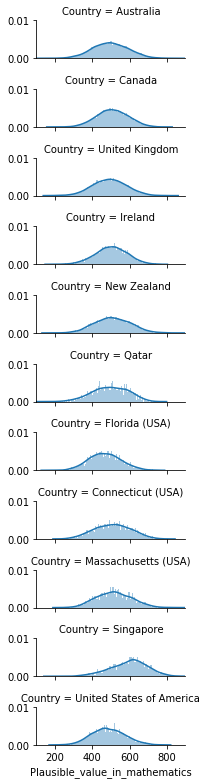

In [470]:
# 
g = sb.FacetGrid(data=english_df, row='Country', height=1, aspect=3, xlim=(100,900), ylim=(0,0.01))
g.map(sb.distplot, 'Plausible_value_in_mathematics', norm_hist=True, bins=100)

I will keep only the Countries with more than 700 rows, and then I will add the ESCS level (cutting the two lowest and the top one, which are almost empty)

In [404]:
# select Countries with more than 1000 rows
english_count = english_df.Country.value_counts().to_dict().items()

english_df = english_df[english_df.Country.isin([key for key, val in english_count if val > 1000])]

In [409]:
# get the category values to copy and paste
english_df.ESCS_levels.dtype

CategoricalDtype(categories=['-5.32 to -4.38', '-4.38 to -3.44', '-3.44 to -2.51',
                  '-2.51 to -1.57', '-1.57 to -0.63', '-0.63 to 0.31',
                  '0.31 to 1.24', '1.24 to 2.18', '2.18 to 3.12'],
                 ordered=True)

In [414]:
# drop the lines in the two lowest ESCS levels and in the top one
ESCS_drop = ['-5.32 to -4.38', '-4.38 to -3.44', '2.18 to 3.12']
english_df = english_df.drop(english_df[english_df.ESCS_levels.isin(ESCS_drop)].index)
# Modify the category
ESCS_ordered2 = ['-3.44 to -2.51', '-2.51 to -1.57', '-1.57 to -0.63', '-0.63 to 0.31', '0.31 to 1.24', '1.24 to 2.18']
ESCS_middle_cat = pd.api.types.CategoricalDtype(ordered=True, categories=ESCS_ordered2)
english_df.ESCS_levels = english_df.ESCS_levels.astype(ESCS_middle_cat)

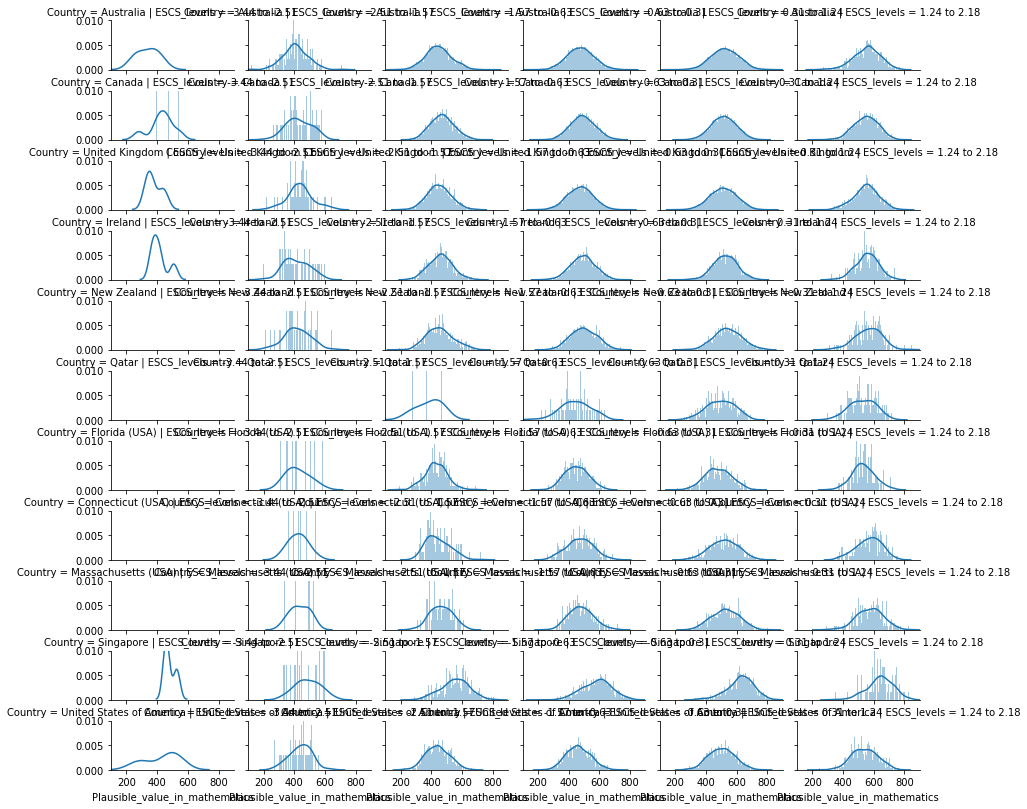

In [416]:
# plot the math scores by Country divided by ESCS level
g = sb.FacetGrid(data=english_df, col='ESCS_levels', row='Country', height=1, aspect=2, xlim=(100,900), ylim=(0,0.01))
g.map(sb.distplot, 'Plausible_value_in_mathematics', norm_hist=True, bins=100)
g.add_legend();

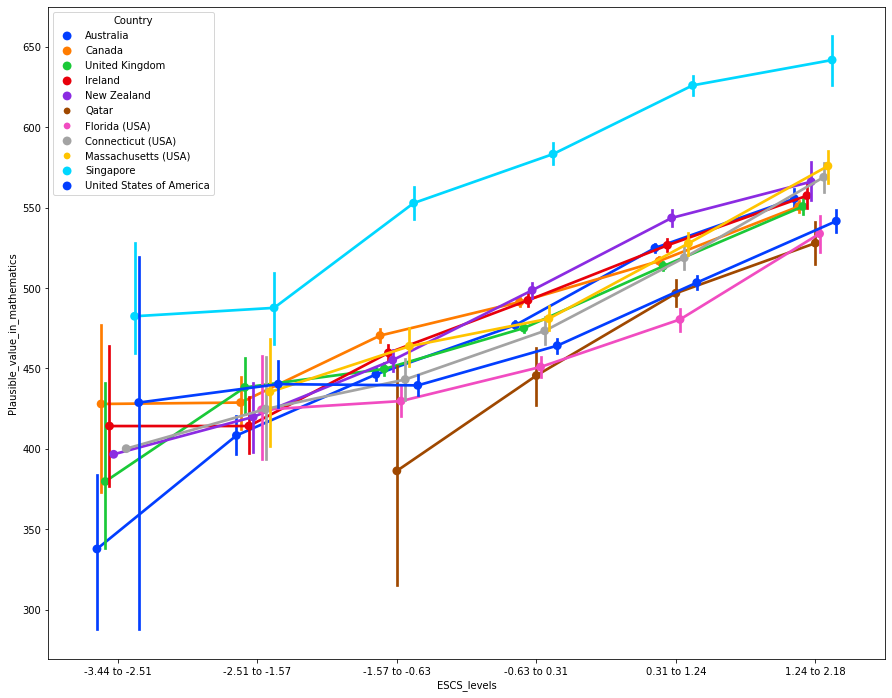

In [461]:
# plot the math scores by Country divided by ESCS level (English speaking countries)

plt.figure(figsize=(15,12))
g = sb.pointplot(data=english_df, x="ESCS_levels", y="Plausible_value_in_mathematics",
                 hue="Country", dodge=.3, palette='bright')

In [423]:
# collect the logographic countries
logographic_df = exploration_df1.query('Language_type=="logographic"')
logographic_df.groupby('Country').Language_of_the_test.value_counts()

Country          Language_of_the_test
China-Shanghai   Shanghai dialect        5054
Chinese Taipei   Mandarin                4695
Hong Kong-China  Cantonese               4157
Japan            Japanese                6059
Korea            Korean                  4954
Macao-China      Chinese                 4281
Name: Language_of_the_test, dtype: int64

In [424]:
# drop the lines in the two lowest ESCS levels and in the top one
# list is ESCS_drop = ['-5.32 to -4.38', '-4.38 to -3.44', '2.18 to 3.12']
logographic_df = logographic_df.drop(logographic_df[logographic_df.ESCS_levels.isin(ESCS_drop)].index)
# Modify the category
# cat is ESCS_ordered2 = ['-3.44 to -2.51', '-2.51 to -1.57', '-1.57 to -0.63', '-0.63 to 0.31', '0.31 to 1.24', '1.24 to 2.18']
# ESCS_middle_cat = pd.api.types.CategoricalDtype(ordered=True, categories=ESCS_ordered2)
logographic_df.ESCS_levels = logographic_df.ESCS_levels.astype(ESCS_middle_cat)

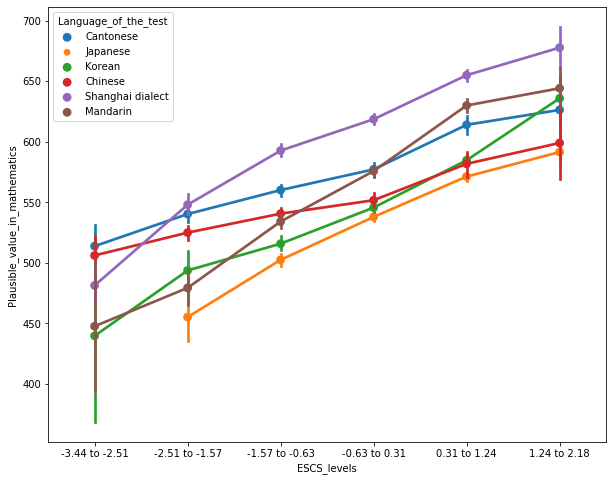

In [455]:
# plot the math scores by logographic languages (=Countries) divided byESCS (logographic)

plt.figure(figsize=(10,8))
g = sb.pointplot(data=logographic_df, x="ESCS_levels", y="Plausible_value_in_mathematics", hue="Language_of_the_test")

C:\Users\annap\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


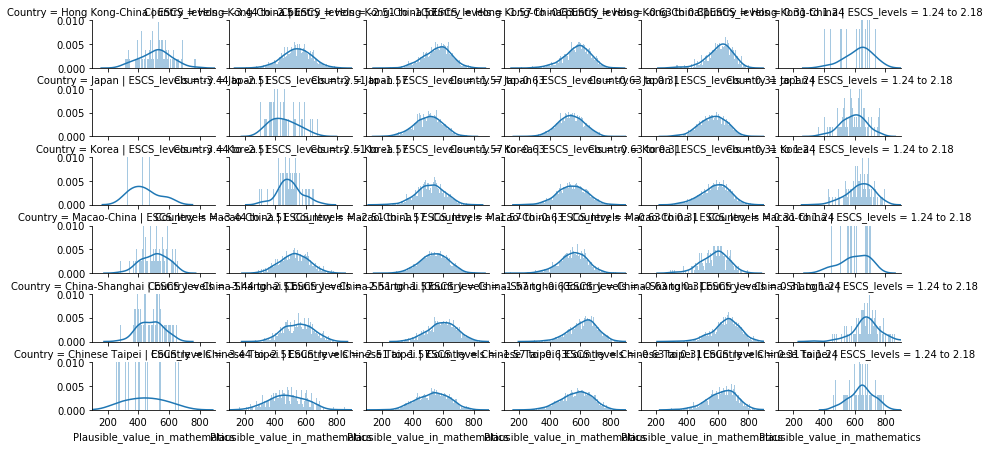

In [426]:
# plot the math scores by Country divided by ESCS level
g = sb.FacetGrid(data=logographic_df, col='ESCS_levels', row='Country', height=1, aspect=2, xlim=(100,900), ylim=(0,0.01))
g.map(sb.distplot, 'Plausible_value_in_mathematics', norm_hist=True, bins=100)
g.add_legend();

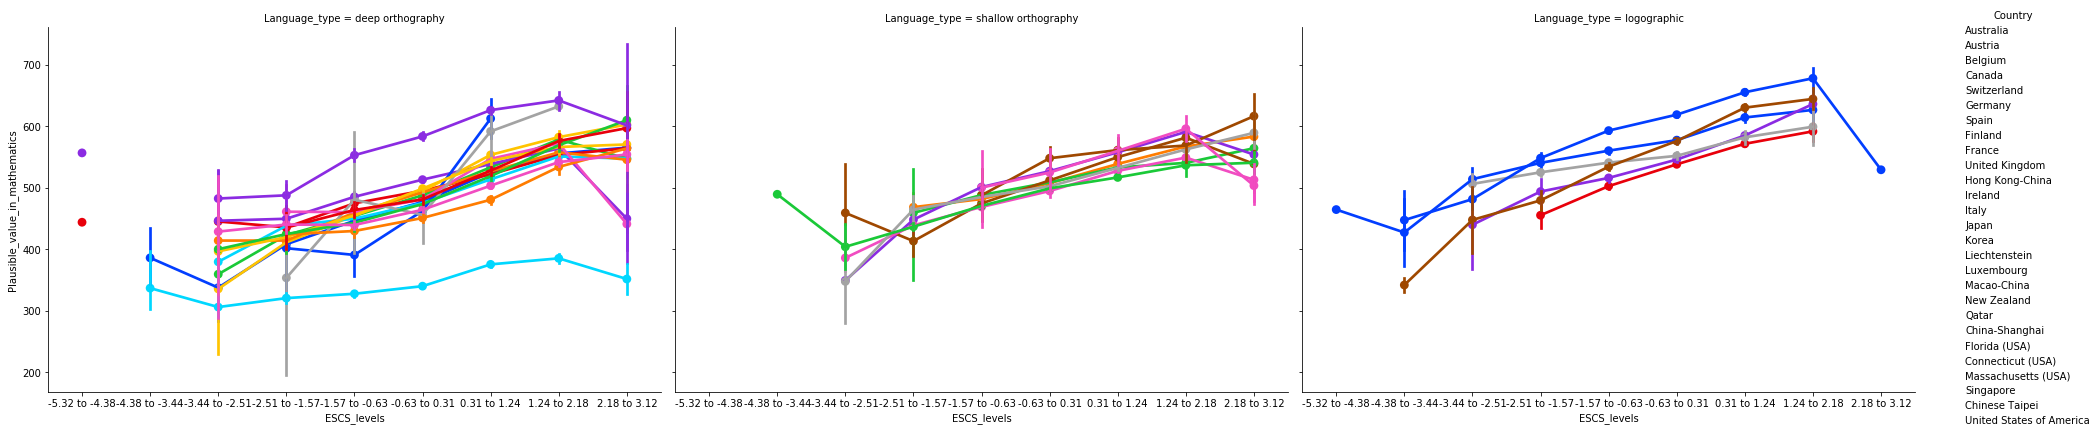

In [469]:
# just to have them all

g = sb.FacetGrid(data=exploration_df1, hue="Country", col='Language_type', palette='bright', height=6, aspect=1.5)
g.map(sb.pointplot, "ESCS_levels", "Plausible_value_in_mathematics",
                 dodge=.3)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!